# Library Import

In [81]:
# ÌïúÍµ≠Ïñ¥ ÌÖçÏä§Ìä∏ Í∞êÏ†ï Î∂ÑÏÑùÏùÑ ÏúÑÌïú ÌïÑÏàò ÎùºÏù¥Î∏åÎü¨Î¶¨Îì§
from collections import Counter  # Ïπ¥Ïö¥ÌÑ∞ ÏûêÎ£åÍµ¨Ï°∞
import os  # Ïö¥ÏòÅÏ≤¥Ï†ú Ïù∏ÌÑ∞ÌéòÏù¥Ïä§
import platform  # ÌîåÎû´Ìèº Ï†ïÎ≥¥
import re  # Ï†ïÍ∑ú ÌëúÌòÑÏãù
import sys  # ÏãúÏä§ÌÖú Ï†ïÎ≥¥
import warnings  # Í≤ΩÍ≥† Î©îÏãúÏßÄ Ï†úÏñ¥
import math


import matplotlib.pyplot as plt  # Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
plt.rc("font", family="NanumBarunGothic")  # ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï(ÏóÜÏúºÎ©¥ ÏÑ§Ïπò ÌïÑÏöî)

import numpy as np  # ÏàòÏπò Ïó∞ÏÇ∞
import pandas as pd  # Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ Î∞è Î∂ÑÏÑù
import seaborn as sns  # Í≥†Í∏â ÏãúÍ∞ÅÌôî
import torch  # Îî•Îü¨Îãù ÌîÑÎ†àÏûÑÏõåÌÅ¨
import koreanize_matplotlib
import wandb
# Î®∏Ïã†Îü¨Îãù Í¥ÄÎ†® ÎùºÏù¥Î∏åÎü¨Î¶¨
from sklearn.metrics import accuracy_score, f1_score  # ÌèâÍ∞Ä ÏßÄÌëú
from sklearn.model_selection import train_test_split, StratifiedKFold  # Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†

# Ìä∏ÎûúÏä§Ìè¨Î®∏ Î∞è BERT Í¥ÄÎ†® ÎùºÏù¥Î∏åÎü¨Î¶¨
from transformers import (
    AutoModelForSequenceClassification,  # ÏãúÌÄÄÏä§ Î∂ÑÎ•ò Î™®Îç∏
    AutoTokenizer,  # ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä
    DataCollatorWithPadding,  # Ìå®Îî© Îç∞Ïù¥ÌÑ∞ ÏΩúÎ†àÏù¥ÌÑ∞
    set_seed,
    Trainer,  # Ìä∏Î†àÏù¥ÎÑà
    TrainingArguments,  # ÌõàÎ†® ÏÑ§Ï†ï
)

# PyTorch Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
from torch.utils.data import Dataset  # Îç∞Ïù¥ÌÑ∞ÏÖã Î∞è Îç∞Ïù¥ÌÑ∞Î°úÎçî

# Í≤ΩÍ≥† Î©îÏãúÏßÄ ÌïÑÌÑ∞ÎßÅ
warnings.filterwarnings("ignore")

# ÎùºÏù¥Î∏åÎü¨Î¶¨ Î≤ÑÏ†Ñ Ï†ïÎ≥¥ Ï∂úÎ†• (Ïû¨ÌòÑÏÑ±ÏùÑ ÏúÑÌï®)
print("=== ÎùºÏù¥Î∏åÎü¨Î¶¨ Î≤ÑÏ†Ñ Ï†ïÎ≥¥ ===")
print(f"Python: {sys.version}")
print(f"Platform: {platform.platform()}")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"torch: {torch.__version__}")
print(f"transformers: {__import__('transformers').__version__}")
print(f"sklearn: {__import__('sklearn').__version__}")
print(f"matplotlib: {__import__('matplotlib').__version__}")
print(f"seaborn: {sns.__version__}")

# GPU ÏÇ¨Ïö© Í∞ÄÎä• Ïó¨Î∂Ä ÌôïÏù∏
print("\n=== PyTorch GPU ÏßÄÏõê Ï†ïÎ≥¥ ===")
print(f"CUDA ÏÇ¨Ïö© Í∞ÄÎä•: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA Î≤ÑÏ†Ñ: {torch.version.cuda}")
    print(f"GPU Í∞úÏàò: {torch.cuda.device_count()}")
    print(f"ÌòÑÏû¨ GPU: {torch.cuda.current_device()}")
    print(f"GPU Ïù¥Î¶Ñ: {torch.cuda.get_device_name()}")
else:
    print("CPUÏóêÏÑú Ïã§Ìñâ Ï§ë")

=== ÎùºÏù¥Î∏åÎü¨Î¶¨ Î≤ÑÏ†Ñ Ï†ïÎ≥¥ ===
Python: 3.10.13 (main, Sep 11 2023, 13:44:35) [GCC 11.2.0]
Platform: Linux-5.4.0-99-generic-x86_64-with-glibc2.31
pandas: 2.2.3
numpy: 1.26.4
torch: 2.6.0+cu124
transformers: 4.55.0
sklearn: 1.6.1
matplotlib: 3.10.5
seaborn: 0.13.2

=== PyTorch GPU ÏßÄÏõê Ï†ïÎ≥¥ ===
CUDA ÏÇ¨Ïö© Í∞ÄÎä•: True
CUDA Î≤ÑÏ†Ñ: 12.4
GPU Í∞úÏàò: 1
ÌòÑÏû¨ GPU: 0
GPU Ïù¥Î¶Ñ: Tesla V100-SXM2-32GB


In [82]:
from dotenv import load_dotenv
import os

# Ïù¥ Ìï®ÏàòÍ∞Ä .env ÌååÏùºÏùÑ ÏùΩÏñ¥ÏÑú ÌôòÍ≤Ω Î≥ÄÏàòÎ°ú Î°úÎìúÌï©ÎãàÎã§.
load_dotenv()

True

## Random Seed Configuration

In [83]:
# ÎûúÎç§ ÏãúÎìú ÏÑ§Ï†ï
RANDOM_STATE = 42


set_seed(RANDOM_STATE)

print(f"ÎûúÎç§ ÏãúÎìú {RANDOM_STATE}Î°ú ÏÑ§Ï†ï ÏôÑÎ£å")

ÎûúÎç§ ÏãúÎìú 42Î°ú ÏÑ§Ï†ï ÏôÑÎ£å


# Data Load

In [84]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv("data/train.csv")

# Ï≤òÏùå Î™á Ìñâ ÌëúÏãú
print("\nÏ≤òÏùå 5Ìñâ:")
df.head()


Ï≤òÏùå 5Ìñâ:


ID                                             review  label      type
0   0  Ïù¥ ÏòÅÌôîÎäî Ï†ïÎßê Ïó¨ÏÑ±Ïùò Í∞ïÏù∏Ìï®Í≥º ÌûòÏùÑ Ï†úÎåÄÎ°ú Î≥¥Ïó¨Ï£ºÎäî ÏûëÌíàÏù¥ÏóàÏñ¥Ïöî! Ï£ºÏù∏Í≥µÏù¥ ÏûêÍ∏∞ ...      2   augment
1   1                                 Ïñ¥Îäê Î∂ÄÏû£Ïßë ÎèÑÎ†®ÎãòÏùò Ï≤†ÏóÜÎäî ÌñâÍ∞Å      1  original
2   3                     ÏôúÏù¥Î†áÍ≤å Ïû¨ÎØ∏Í∞ÄÏóÜÎÉê ÏõêÎèÑ Î≥ÑÎ°úÏòÄÏßÄÎßå ÏõêÎ≥¥Îã§ Îçî Ïû¨ÎØ∏ÏóÜÎÑ§      0  original
3   4  ÌÅ¨Î¶¨Ïä§ÎßàÏä§ ÏãúÏ¶åÏóî Î¨¥Ï°∞Í±¥ Ìôà ÏïåÎ°†Ïù¥Ï£†! Îß•Ïª¨Î¶¨ Ïª¨ÌÇ®Ïù¥ Ïó∞Í∏∞Ìïú ÏºÄÎπàÏùò Ïû¨ÏπòÏûàÍ≥† Ï≤úÎ∞©ÏßÄ...      2   augment
4   5  Ï∞∏ÎÇò„Öã„ÖãÏù¥Í≤å Î¨¥Ïä® ÎìúÎùºÎßà ÏµúÏ¥à ÎÆ§ÏßÄÏª¨ÎìúÎùºÎßàÏïº Ïù¥Í≤åÎ¨¥Ïä®„Öã„ÖãÍ±ç Îã§Î•∏ ÎìúÎùºÎßàÎûë ÎòëÍ∞ôÍµ¨Îßå ...      0  original

# EDA (Explanatory Data Analysis)


## Îç∞Ïù¥ÌÑ∞ Í∞úÏöî Î∞è ÌíàÏßà Í≤ÄÏÇ¨

- Îç∞Ïù¥ÌÑ∞ÏÖã ÌòïÌÉú Î∞è Í∏∞Î≥∏ Ï†ïÎ≥¥
- Í≤∞Ï∏°Í∞í
- Ï§ëÎ≥µÍ∞í
- Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏


In [ ]:
# Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¨Í∏∞ Î∞è Í∏∞Î≥∏ Ï†ïÎ≥¥ ÌôïÏù∏
print(f"Îç∞Ïù¥ÌÑ∞ÏÖã ÌòïÌÉú: {df.shape}")
print(f"Ìñâ Ïàò: {df.shape[0]}")
print(f"Ïó¥ Ïàò: {df.shape[1]}")
print(f"Ïó¥ Ïù¥Î¶Ñ: {list(df.columns)}")

# ÌÉÄÏûÖÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÌôïÏù∏
print("\nÌÉÄÏûÖÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨:")
type_counts = df["type"].value_counts()
type_percentages = df["type"].value_counts(normalize=True) * 100
for type_name, count in type_counts.items():
    percentage = type_percentages[type_name]
    print(f"  {type_name}: {count:,}Í∞ú ({percentage:.1f}%)")

# Í≤∞Ï∏°Í∞í ÌôïÏù∏
print("\nÍ≤∞Ï∏°Í∞í:")
print(df.isnull().sum())

# Ï§ëÎ≥µÍ∞í ÌôïÏù∏
print(f"\nÏ§ëÎ≥µ Î¶¨Î∑∞: {df['review'].duplicated().sum()}")
print(f"Ï§ëÎ≥µ Ìñâ: {df.duplicated().sum()}")

if df["review"].duplicated().sum() > 0:
    print("\nÏ§ëÎ≥µÎêú Î¶¨Î∑∞ ÏòàÏãú:")
    duplicated_reviews = df[df["review"].duplicated(keep=False)].sort_values("review")
    print(duplicated_reviews[["review", "label", "type"]].head(10))

# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏
print("\nÎç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ:")
print(df.dtypes)


Îç∞Ïù¥ÌÑ∞ÏÖã ÌòïÌÉú: (279650, 4)
Ìñâ Ïàò: 279650
Ïó¥ Ïàò: 4
Ïó¥ Ïù¥Î¶Ñ: ['ID', 'review', 'label', 'type']

ÌÉÄÏûÖÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨:
  augment: 139,825Í∞ú (50.0%)
  original: 139,825Í∞ú (50.0%)

Í≤∞Ï∏°Í∞í:
ID        0
review    6
label     0
type      0
dtype: int64

Ï§ëÎ≥µ Î¶¨Î∑∞: 3350
Ï§ëÎ≥µ Ìñâ: 0

Ï§ëÎ≥µÎêú Î¶¨Î∑∞ ÏòàÏãú:
       review  label      type
112658      !      2  original
197409      !      0  original
235169    -_-      0  original
85131     -_-      0  original
140661    -_-      0  original
35114       0      1  original
187569      0      1  original
159660     0Ï†ê      0  original
217122     0Ï†ê      0  original
209801     0Ï†ê      0  original

Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ:
ID         int64
review    object
label      int64
type      object
dtype: object


## ÌÉÄÏûÖÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù

- Original vs Augment Îç∞Ïù¥ÌÑ∞ ÎπÑÍµê
- ÌÉÄÏûÖÎ≥Ñ ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨
- ÌÉÄÏûÖÎ≥Ñ ÌÖçÏä§Ìä∏ ÌäπÏÑ± Î∂ÑÏÑù


In [ ]:
# ÌÉÄÏûÖÎ≥Ñ ÏÉÅÏÑ∏ Î∂ÑÏÑù
print("=" * 50)
print("ÌÉÄÏûÖÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù")
print("=" * 50)

# ÌÉÄÏûÖÎ≥Ñ Í∏∞Î≥∏ ÌÜµÍ≥Ñ
for data_type in df["type"].unique():
    type_data = df[df["type"] == data_type]
    print(f"\n[{data_type.upper()} Îç∞Ïù¥ÌÑ∞]")
    print(f"  Ï¥ù Í∞úÏàò: {len(type_data):,}Í∞ú")
    print(f"  ÎπÑÏú®: {len(type_data)/len(df)*100:.1f}%")
    
    # ÌÉÄÏûÖÎ≥Ñ ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨
    print(f"  ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨:")
    type_class_counts = type_data["label"].value_counts().sort_index()
    type_class_percentages = type_data["label"].value_counts(normalize=True).sort_index() * 100
    for label, count in type_class_counts.items():
        percentage = type_class_percentages[label]
        print(f"    ÌÅ¥ÎûòÏä§ {label} ({LABEL_MAPPING[label]}): {count:,}Í∞ú ({percentage:.1f}%)")
    
    # ÌÉÄÏûÖÎ≥Ñ ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ ÌÜµÍ≥Ñ
    type_data["text_length"] = type_data["review"].str.len()
    type_data["word_count"] = type_data["review"].str.split().str.len()
    
    print(f"  ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ ÌÜµÍ≥Ñ:")
    print(f"    ÌèâÍ∑† Î¨∏Ïûê Ïàò: {type_data['text_length'].mean():.1f}")
    print(f"    ÌèâÍ∑† Îã®Ïñ¥ Ïàò: {type_data['word_count'].mean():.1f}")
    print(f"    ÏµúÎåÄ Î¨∏Ïûê Ïàò: {type_data['text_length'].max()}")
    print(f"    ÏµúÏÜå Î¨∏Ïûê Ïàò: {type_data['text_length'].min()}")

print("\n‚úÖ ÌÉÄÏûÖÎ≥Ñ Î∂ÑÏÑù ÏôÑÎ£å")


ÌÉÄÏûÖÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù

[AUGMENT Îç∞Ïù¥ÌÑ∞]
  Ï¥ù Í∞úÏàò: 139,825Í∞ú
  ÎπÑÏú®: 50.0%
  ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨:
    ÌÅ¥ÎûòÏä§ 0 (Í∞ïÌïú Î∂ÄÏ†ï): 57,033Í∞ú (40.8%)
    ÌÅ¥ÎûòÏä§ 1 (ÏïΩÌïú Î∂ÄÏ†ï): 13,608Í∞ú (9.7%)
    ÌÅ¥ÎûòÏä§ 2 (ÏïΩÌïú Í∏çÏ†ï): 49,708Í∞ú (35.6%)
    ÌÅ¥ÎûòÏä§ 3 (Í∞ïÌïú Í∏çÏ†ï): 19,476Í∞ú (13.9%)
  ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ ÌÜµÍ≥Ñ:
    ÌèâÍ∑† Î¨∏Ïûê Ïàò: 282.0
    ÌèâÍ∑† Îã®Ïñ¥ Ïàò: 69.9
    ÏµúÎåÄ Î¨∏Ïûê Ïàò: 2035
    ÏµúÏÜå Î¨∏Ïûê Ïàò: 44

[ORIGINAL Îç∞Ïù¥ÌÑ∞]
  Ï¥ù Í∞úÏàò: 139,825Í∞ú
  ÎπÑÏú®: 50.0%
  ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨:
    ÌÅ¥ÎûòÏä§ 0 (Í∞ïÌïú Î∂ÄÏ†ï): 57,033Í∞ú (40.8%)
    ÌÅ¥ÎûòÏä§ 1 (ÏïΩÌïú Î∂ÄÏ†ï): 13,608Í∞ú (9.7%)
    ÌÅ¥ÎûòÏä§ 2 (ÏïΩÌïú Í∏çÏ†ï): 49,708Í∞ú (35.6%)
    ÌÅ¥ÎûòÏä§ 3 (Í∞ïÌïú Í∏çÏ†ï): 19,476Í∞ú (13.9%)
  ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ ÌÜµÍ≥Ñ:
    ÌèâÍ∑† Î¨∏Ïûê Ïàò: 35.3
    ÌèâÍ∑† Îã®Ïñ¥ Ïàò: 7.6
    ÏµúÎåÄ Î¨∏Ïûê Ïàò: 142.0
    ÏµúÏÜå Î¨∏Ïûê Ïàò: 1.0

‚úÖ ÌÉÄÏûÖÎ≥Ñ Î∂ÑÏÑù ÏôÑÎ£å


ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∞è Îã®Ïñ¥ Ïàò Ïª¨Îüº ÏÉùÏÑ± Ï§ë...
‚úÖ ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∞è Îã®Ïñ¥ Ïàò Ïª¨Îüº ÏÉùÏÑ± ÏôÑÎ£å


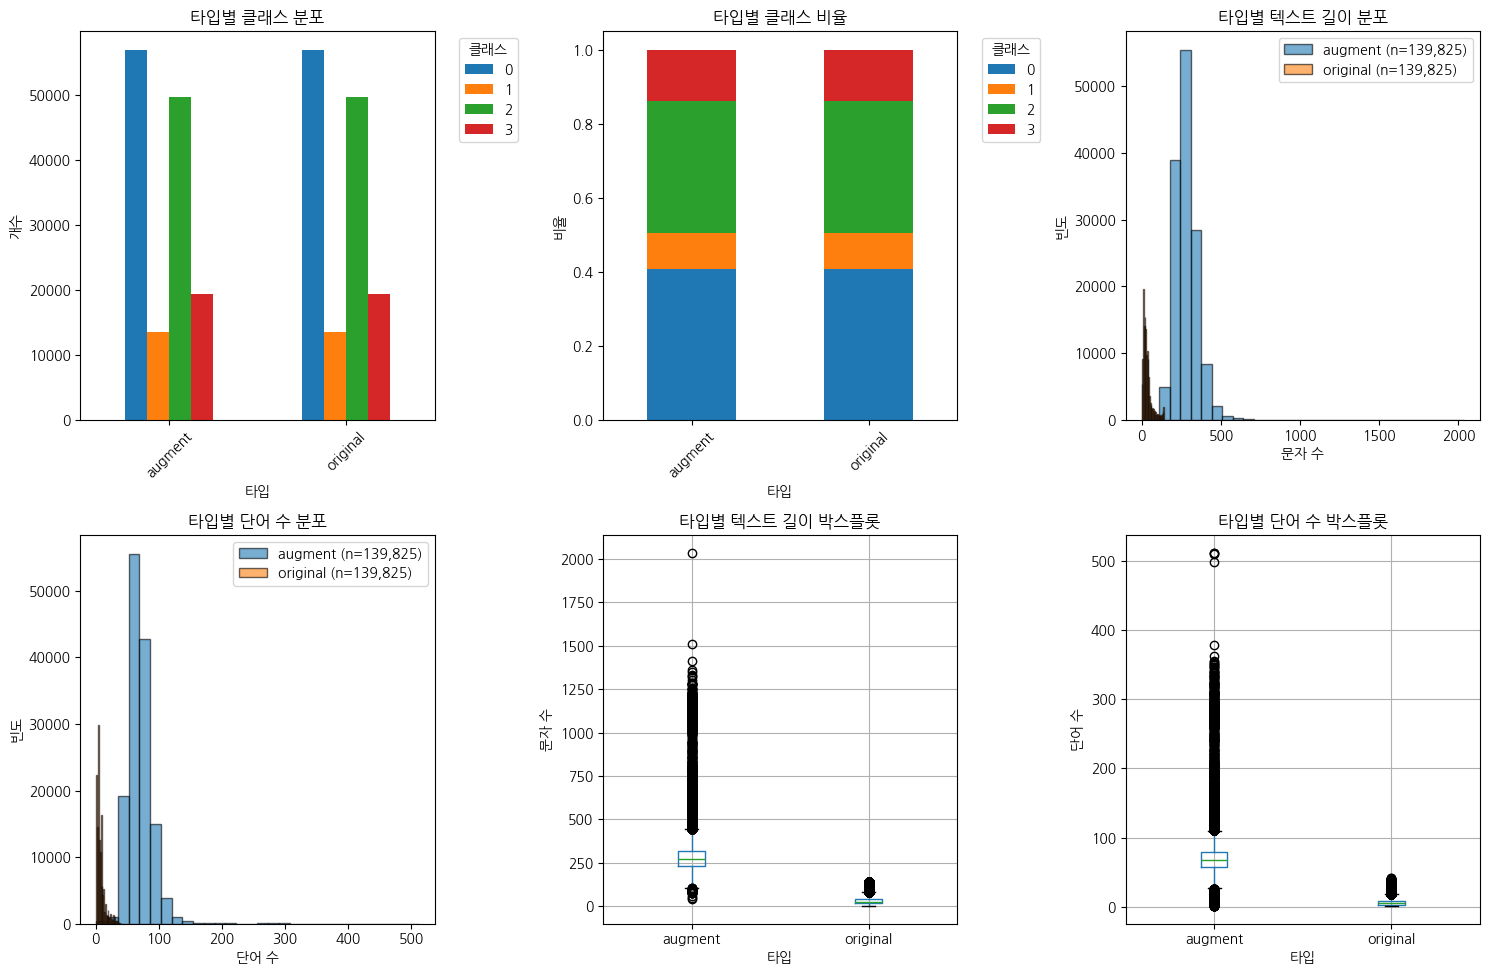

In [ ]:
# ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∞è Îã®Ïñ¥ Ïàò Ïª¨Îüº ÏÉùÏÑ± (ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥)
print("ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∞è Îã®Ïñ¥ Ïàò Ïª¨Îüº ÏÉùÏÑ± Ï§ë...")
df["text_length"] = df["review"].str.len()
df["word_count"] = df["review"].str.split().str.len()
print("‚úÖ ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∞è Îã®Ïñ¥ Ïàò Ïª¨Îüº ÏÉùÏÑ± ÏôÑÎ£å")

# ÌÉÄÏûÖÎ≥Ñ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(15, 10))

# 1. ÌÉÄÏûÖÎ≥Ñ ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ ÎπÑÍµê
plt.subplot(2, 3, 1)
type_class_pivot = df.groupby(['type', 'label']).size().unstack(fill_value=0)
type_class_pivot.plot(kind='bar', ax=plt.gca())
plt.title('ÌÉÄÏûÖÎ≥Ñ ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨')
plt.xlabel('ÌÉÄÏûÖ')
plt.ylabel('Í∞úÏàò')
plt.legend(title='ÌÅ¥ÎûòÏä§', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# 2. ÌÉÄÏûÖÎ≥Ñ ÌÅ¥ÎûòÏä§ ÎπÑÏú® ÎπÑÍµê (Ï†ïÍ∑úÌôî)
plt.subplot(2, 3, 2)
type_class_pivot_norm = type_class_pivot.div(type_class_pivot.sum(axis=1), axis=0)
type_class_pivot_norm.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('ÌÉÄÏûÖÎ≥Ñ ÌÅ¥ÎûòÏä§ ÎπÑÏú®')
plt.xlabel('ÌÉÄÏûÖ')
plt.ylabel('ÎπÑÏú®')
plt.legend(title='ÌÅ¥ÎûòÏä§', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# 3. ÌÉÄÏûÖÎ≥Ñ ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∂ÑÌè¨
plt.subplot(2, 3, 3)
for data_type in df["type"].unique():
    type_data = df[df["type"] == data_type]
    plt.hist(type_data["text_length"], bins=30, alpha=0.6, 
             label=f"{data_type} (n={len(type_data):,})", edgecolor='black')
plt.title('ÌÉÄÏûÖÎ≥Ñ ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∂ÑÌè¨')
plt.xlabel('Î¨∏Ïûê Ïàò')
plt.ylabel('ÎπàÎèÑ')
plt.legend()

# 4. ÌÉÄÏûÖÎ≥Ñ Îã®Ïñ¥ Ïàò Î∂ÑÌè¨
plt.subplot(2, 3, 4)
for data_type in df["type"].unique():
    type_data = df[df["type"] == data_type]
    plt.hist(type_data["word_count"], bins=30, alpha=0.6, 
             label=f"{data_type} (n={len(type_data):,})", edgecolor='black')
plt.title('ÌÉÄÏûÖÎ≥Ñ Îã®Ïñ¥ Ïàò Î∂ÑÌè¨')
plt.xlabel('Îã®Ïñ¥ Ïàò')
plt.ylabel('ÎπàÎèÑ')
plt.legend()

# 5. ÌÉÄÏûÖÎ≥Ñ ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∞ïÏä§ÌîåÎ°Ø
plt.subplot(2, 3, 5)
df.boxplot(column='text_length', by='type', ax=plt.gca())
plt.title('ÌÉÄÏûÖÎ≥Ñ ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∞ïÏä§ÌîåÎ°Ø')
plt.xlabel('ÌÉÄÏûÖ')
plt.ylabel('Î¨∏Ïûê Ïàò')
plt.suptitle('')  # Í∏∞Î≥∏ Ï†úÎ™© Ï†úÍ±∞

# 6. ÌÉÄÏûÖÎ≥Ñ Îã®Ïñ¥ Ïàò Î∞ïÏä§ÌîåÎ°Ø
plt.subplot(2, 3, 6)
df.boxplot(column='word_count', by='type', ax=plt.gca())
plt.title('ÌÉÄÏûÖÎ≥Ñ Îã®Ïñ¥ Ïàò Î∞ïÏä§ÌîåÎ°Ø')
plt.xlabel('ÌÉÄÏûÖ')
plt.ylabel('Îã®Ïñ¥ Ïàò')
plt.suptitle('')  # Í∏∞Î≥∏ Ï†úÎ™© Ï†úÍ±∞

plt.tight_layout()
plt.show()


In [ ]:
# ÌÉÄÏûÖÎ≥Ñ ÌÖçÏä§Ìä∏ ÌíàÏßà Î∂ÑÏÑù
print("=" * 50)
print("ÌÉÄÏûÖÎ≥Ñ ÌÖçÏä§Ìä∏ ÌíàÏßà Î∂ÑÏÑù")
print("=" * 50)

for data_type in df["type"].unique():
    type_data = df[df["type"] == data_type]
    print(f"\n[{data_type.upper()} Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Î∂ÑÏÑù]")
    
    # 1. Null Í∞í Î∞è Îπà ÌÖçÏä§Ìä∏ ÌôïÏù∏
    null_count = type_data["review"].isnull().sum()
    empty_texts = type_data["review"].str.strip().eq("").sum()
    whitespace_only = type_data["review"].str.isspace().sum()
    
    print(f"  Null Í∞í: {null_count}Í∞ú")
    print(f"  Îπà ÌÖçÏä§Ìä∏: {empty_texts}Í∞ú")
    print(f"  Í≥µÎ∞±Îßå ÏûàÎäî ÌÖçÏä§Ìä∏: {whitespace_only}Í∞ú")
    
    # 2. Ï§ëÎ≥µ ÌÖçÏä§Ìä∏ ÌôïÏù∏
    duplicate_count = type_data["review"].duplicated().sum()
    print(f"  Ï§ëÎ≥µ Î¶¨Î∑∞: {duplicate_count}Í∞ú")
    
    # 3. ÌäπÏàò Î¨∏ÏûêÎßåÏúºÎ°ú Íµ¨ÏÑ±Îêú ÌÖçÏä§Ìä∏ ÌôïÏù∏
    special_char_only = type_data["review"].str.match(r"^[^\w\sÍ∞Ä-Ìû£]+$", na=False).sum()
    print(f"  ÌäπÏàòÎ¨∏ÏûêÎßå ÏûàÎäî Î¶¨Î∑∞: {special_char_only}Í∞ú")
    
    # 4. Ïà´ÏûêÎßåÏúºÎ°ú Íµ¨ÏÑ±Îêú ÌÖçÏä§Ìä∏ ÌôïÏù∏
    digit_only = type_data["review"].str.match(r"^\d+$", na=False).sum()
    print(f"  Ïà´ÏûêÎßå ÏûàÎäî Î¶¨Î∑∞: {digit_only}Í∞ú")
    
    # 5. ÌïúÍ∏ÄÏù¥ ÏóÜÎäî ÌÖçÏä§Ìä∏ ÌôïÏù∏
    non_korean = ~type_data["review"].str.contains(r"[Í∞Ä-Ìû£„Ñ±-„Öé„Öè-„Ö£]", na=False)
    non_korean_count = non_korean.sum()
    print(f"  ÌïúÍ∏ÄÏù¥ ÏóÜÎäî Î¶¨Î∑∞: {non_korean_count}Í∞ú")
    
    # 6. ÌíàÏßà Ïù¥Ïäà Ï¢ÖÌï©
    total_issues = null_count + empty_texts + whitespace_only + duplicate_count + special_char_only + digit_only + non_korean_count
    print(f"  Ï¥ù ÌíàÏßà Ïù¥Ïäà: {total_issues:,}Í∞ú ({total_issues/len(type_data)*100:.2f}%)")
    print(f"  ÏñëÏßàÏùò Îç∞Ïù¥ÌÑ∞: {len(type_data)-total_issues:,}Í∞ú ({(len(type_data)-total_issues)/len(type_data)*100:.2f}%)")

print("\n‚úÖ ÌÉÄÏûÖÎ≥Ñ ÌíàÏßà Î∂ÑÏÑù ÏôÑÎ£å")


ÌÉÄÏûÖÎ≥Ñ ÌÖçÏä§Ìä∏ ÌíàÏßà Î∂ÑÏÑù

[AUGMENT Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Î∂ÑÏÑù]
  Null Í∞í: 0Í∞ú
  Îπà ÌÖçÏä§Ìä∏: 0Í∞ú
  Í≥µÎ∞±Îßå ÏûàÎäî ÌÖçÏä§Ìä∏: 0Í∞ú
  Ï§ëÎ≥µ Î¶¨Î∑∞: 7Í∞ú
  ÌäπÏàòÎ¨∏ÏûêÎßå ÏûàÎäî Î¶¨Î∑∞: 0Í∞ú
  Ïà´ÏûêÎßå ÏûàÎäî Î¶¨Î∑∞: 0Í∞ú
  ÌïúÍ∏ÄÏù¥ ÏóÜÎäî Î¶¨Î∑∞: 4Í∞ú
  Ï¥ù ÌíàÏßà Ïù¥Ïäà: 11Í∞ú (0.01%)
  ÏñëÏßàÏùò Îç∞Ïù¥ÌÑ∞: 139,814Í∞ú (99.99%)

[ORIGINAL Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Î∂ÑÏÑù]
  Null Í∞í: 6Í∞ú
  Îπà ÌÖçÏä§Ìä∏: 0Í∞ú
  Í≥µÎ∞±Îßå ÏûàÎäî ÌÖçÏä§Ìä∏: 0Í∞ú
  Ï§ëÎ≥µ Î¶¨Î∑∞: 3343Í∞ú
  ÌäπÏàòÎ¨∏ÏûêÎßå ÏûàÎäî Î¶¨Î∑∞: 88Í∞ú
  Ïà´ÏûêÎßå ÏûàÎäî Î¶¨Î∑∞: 64Í∞ú
  ÌïúÍ∏ÄÏù¥ ÏóÜÎäî Î¶¨Î∑∞: 1038Í∞ú
  Ï¥ù ÌíàÏßà Ïù¥Ïäà: 4,539Í∞ú (3.25%)
  ÏñëÏßàÏùò Îç∞Ïù¥ÌÑ∞: 135,286Í∞ú (96.75%)

‚úÖ ÌÉÄÏûÖÎ≥Ñ ÌíàÏßà Î∂ÑÏÑù ÏôÑÎ£å


In [ ]:
# ÌÉÄÏûÖÎ≥Ñ ÏÉòÌîå Î¶¨Î∑∞ Î∂ÑÏÑù
print("=" * 50)
print("ÌÉÄÏûÖÎ≥Ñ ÏÉòÌîå Î¶¨Î∑∞ Î∂ÑÏÑù")
print("=" * 50)

for data_type in df["type"].unique():
    type_data = df[df["type"] == data_type]
    print(f"\n[{data_type.upper()} Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå Î¶¨Î∑∞]")
    
    # Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ ÏÉòÌîå Î¶¨Î∑∞
    for label in sorted(type_data["label"].unique()):
        print(f"\n  ÌÅ¥ÎûòÏä§ {label} ({LABEL_MAPPING[label]}) ÏÉòÌîå:")
        samples = type_data[type_data["label"] == label]["review"].head(2)
        for i, sample in enumerate(samples, 1):
            sample_preview = sample[:100] + "..." if len(sample) > 100 else sample
            print(f"    {i}. {sample_preview}")

print("\n‚úÖ ÌÉÄÏûÖÎ≥Ñ ÏÉòÌîå Î¶¨Î∑∞ Î∂ÑÏÑù ÏôÑÎ£å")


ÌÉÄÏûÖÎ≥Ñ ÏÉòÌîå Î¶¨Î∑∞ Î∂ÑÏÑù

[AUGMENT Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå Î¶¨Î∑∞]

  ÌÅ¥ÎûòÏä§ 0 (Í∞ïÌïú Î∂ÄÏ†ï) ÏÉòÌîå:
    1. ÏßÑÏßú Ïù¥ ÏòÅÌôî Î≥¥Îã§Î≥¥Î©¥ ÎÇ¥Í∞Ä Îã§ Ïïî Í±∏Î¶¥ ÎìØ. Îì±Ïû•Ïù∏Î¨ºÎì§ ÌïòÎÇòÍ∞ôÏù¥ Îã§ Ï†ïÏã†ÏóÜÍ≥†, ÏßúÏ¶ùÎÇòÎäî Ï†ÑÍ∞úÏóê Î®∏Î¶¨Í∞Ä ÏßÄÎÅàÏßÄÎÅàÍ±∞Î†§. ÎèÑÎåÄÏ≤¥ Î¨¥Ïä® ÏÉùÍ∞ÅÏúºÎ°ú Ïù¥Î†áÍ≤å ÎßåÎì§Ïñ¥ÎÜ®ÎäîÏßÄ Í∞êÎèÖÏù¥ Í∂ÅÍ∏àÌï† Ï†ïÎèÑÏïº...
    2. Ïù¥ ÏòÅÌôî ÏßÑÏßú 20ÎåÄÏù∏ ÎÇ¥Í∞Ä Î≥¥Í∏∞ÏóêÎèÑ ÎÑàÎ¨¥ Ïú†ÏπòÌïòÍ≥† ÏßàÎ¶∞Îã§Í≥† ÎäêÍª¥Ï°åÏñ¥Ïöî. Ïä§ÌÜ†Î¶¨ Ï†ÑÍ∞úÎèÑ ÎÑàÎ¨¥ ÎªîÌïòÍ≥†, ÏòàÏÉÅ Í∞ÄÎä•Ìïú ÌùêÎ¶ÑÏù¥ÎùºÏÑú Î≥¥Îäî ÎÇ¥ÎÇ¥ ÌïòÌíàÏù¥ ÎÇòÏôîÏñ¥Ïöî. Ï∫êÎ¶≠ÌÑ∞Îì§ÎèÑ Í∞úÏÑ±Ïù¥ ÎÑàÎ¨¥ ÏóÜ...

  ÌÅ¥ÎûòÏä§ 1 (ÏïΩÌïú Î∂ÄÏ†ï) ÏÉòÌîå:
    1. Ïù¥ ÏòÅÌôîÎäî Í∑∏ÎÉ• Î®∏Î¶¨ ÏãùÌûàÎ©¥ÏÑú Î≥¥Î©¥ Í¥úÏ∞ÆÏùÑ Í≤É Í∞ôÏïÑÏöî. Ïä§ÌÜ†Î¶¨ÎÇò Ïï°ÏÖò Í∞ôÏùÄ Í±¥ Î≥ÑÎ°ú Í∏∞ÎåÄ Ïïà ÌïòÍ≥† Î≥¥Î©¥ Í∑∏ÎûòÎèÑ ÎÇòÎ¶Ñ Ïû¨Î∞åÎäî ÏöîÏÜåÎì§Ïù¥ ÏûàÍ∏¥ Ìï¥Ïöî. ÌäπÌûà, ÏãúÍ∞ÅÌö®Í≥ºÎÇò ÏùåÏïÖ Í∞ôÏùÄ Î∂ÄÎ∂ÑÎì§...
    2. Ïùå... Ïù¥ ÏòÅÌôîÎäî Î≠îÍ∞Ä Í≥ÑÏÜç Î≥¥Îã§ Î≥¥Î©¥ ÎÇòÎèÑ Î™®Î•¥Í≤å Î∂ÑÎÖ∏Í∞Ä Ï∞®Ïò§Î•¥Îäî Î

In [ ]:
# ÌÉÄÏûÖÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† Î∂ÑÏÑù
print("=" * 50)
print("ÌÉÄÏûÖÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† Î∂ÑÏÑù")
print("=" * 50)

# ÌÉÄÏûÖÎ≥Ñ Î∂ÑÌï† Ï†Ñ Î∂ÑÌè¨ ÌôïÏù∏
print("Î∂ÑÌï† Ï†Ñ ÌÉÄÏûÖÎ≥Ñ Î∂ÑÌè¨:")
for data_type in df["type"].unique():
    type_count = len(df[df["type"] == data_type])
    type_percentage = type_count / len(df) * 100
    print(f"  {data_type}: {type_count:,}Í∞ú ({type_percentage:.1f}%)")

print("\n‚úÖ ÌÉÄÏûÖÎ≥Ñ Î∂ÑÌï† Ï†Ñ Î∂ÑÏÑù ÏôÑÎ£å")


ÌÉÄÏûÖÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† Î∂ÑÏÑù
Î∂ÑÌï† Ï†Ñ ÌÉÄÏûÖÎ≥Ñ Î∂ÑÌè¨:
  augment: 139,825Í∞ú (50.0%)
  original: 139,825Í∞ú (50.0%)

‚úÖ ÌÉÄÏûÖÎ≥Ñ Î∂ÑÌï† Ï†Ñ Î∂ÑÏÑù ÏôÑÎ£å


In [ ]:
# ÌÉÄÏûÖÎ≥Ñ ÏûêÏ£º Îì±Ïû•ÌïòÎäî Îã®Ïñ¥ ÎπàÎèÑ Î∂ÑÏÑù
print("=" * 50)
print("ÌÉÄÏûÖÎ≥Ñ ÏûêÏ£º Îì±Ïû•ÌïòÎäî Îã®Ïñ¥ ÎπàÎèÑ Î∂ÑÏÑù")
print("=" * 50)

from collections import Counter
import re

def extract_words(text):
    """ÌÖçÏä§Ìä∏ÏóêÏÑú Îã®Ïñ¥ Ï∂îÏ∂ú (ÌïúÍ∏Ä, ÏòÅÎ¨∏, Ïà´Ïûê Ìè¨Ìï®)"""
    if pd.isna(text):
        return []
    # ÌïúÍ∏Ä, ÏòÅÎ¨∏, Ïà´ÏûêÎßå Ï∂îÏ∂ú
    words = re.findall(r'[Í∞Ä-Ìû£a-zA-Z0-9]+', str(text))
    return [word.lower() for word in words if len(word) > 1]  # 1Í∏ÄÏûê Îã®Ïñ¥ Ï†úÏô∏

# ÌÉÄÏûÖÎ≥Ñ Îã®Ïñ¥ ÎπàÎèÑ Î∂ÑÏÑù
type_word_frequencies = {}

for data_type in df["type"].unique():
    print(f"\n[{data_type.upper()} ÌÉÄÏûÖ Îã®Ïñ¥ ÎπàÎèÑ Î∂ÑÏÑù]")
    type_data = df[df["type"] == data_type]
    
    # Î™®Îì† ÌÖçÏä§Ìä∏ÏóêÏÑú Îã®Ïñ¥ Ï∂îÏ∂ú
    all_words = []
    for text in type_data["review"]:
        words = extract_words(text)
        all_words.extend(words)
    
    # Îã®Ïñ¥ ÎπàÎèÑ Í≥ÑÏÇ∞
    word_counter = Counter(all_words)
    type_word_frequencies[data_type] = word_counter
    
    print(f"  Ï¥ù Îã®Ïñ¥ Ïàò: {len(all_words):,}Í∞ú")
    print(f"  Í≥†Ïú† Îã®Ïñ¥ Ïàò: {len(word_counter):,}Í∞ú")
    print(f"  ÏÉÅÏúÑ 20Í∞ú Îã®Ïñ¥:")
    
    for i, (word, count) in enumerate(word_counter.most_common(20), 1):
        percentage = (count / len(all_words)) * 100
        print(f"    {i:2d}. {word:<15} {count:>6,}Ìöå ({percentage:.2f}%)")

print("\n‚úÖ ÌÉÄÏûÖÎ≥Ñ Îã®Ïñ¥ ÎπàÎèÑ Î∂ÑÏÑù ÏôÑÎ£å")


ÌÉÄÏûÖÎ≥Ñ ÏûêÏ£º Îì±Ïû•ÌïòÎäî Îã®Ïñ¥ ÎπàÎèÑ Î∂ÑÏÑù

[AUGMENT ÌÉÄÏûÖ Îã®Ïñ¥ ÎπàÎèÑ Î∂ÑÏÑù]
  Ï¥ù Îã®Ïñ¥ Ïàò: 8,477,733Í∞ú
  Í≥†Ïú† Îã®Ïñ¥ Ïàò: 256,687Í∞ú
  ÏÉÅÏúÑ 20Í∞ú Îã®Ïñ¥:
     1. ÏßÑÏßú              198,360Ìöå (2.34%)
     2. ÎÑàÎ¨¥              182,486Ìöå (2.15%)
     3. Ï†ïÎßê              134,541Ìöå (1.59%)
     4. ÏòÅÌôî              113,322Ìöå (1.34%)
     5. Î≥¥Îäî              102,600Ìöå (1.21%)
     6. ÏòÅÌôîÎäî             91,666Ìöå (1.08%)
     7. ÌäπÌûà              82,235Ìöå (0.97%)
     8. Î≥¥Í≥†              82,222Ìöå (0.97%)
     9. Ïù¥Îü∞              79,408Ìöå (0.94%)
    10. ÎÇ¥ÎÇ¥              76,426Ìöå (0.90%)
    11. ÏòÅÌôîÎ•º             73,959Ìöå (0.87%)
    12. Í∞ôÏïÑÏöî             59,259Ìöå (0.70%)
    13. ÏòÅÌôîÍ∞Ä             47,530Ìöå (0.56%)
    14. Î∞∞Ïö∞Îì§Ïùò            44,253Ìöå (0.52%)
    15. Í∑∏ÎÉ•              40,905Ìöå (0.48%)
    16. Ï†ÑÌòÄ              34,161Ìöå (0.40%)
    17. ÏôÑÏ†Ñ              32,437Ìöå (0.38%)
    18. Î≥¥Î©¥ÏÑú        

ÌÉÄÏûÖÎ≥Ñ Îã®Ïñ¥ ÏÇ¨Ïö© Ìå®ÌÑ¥ Ï∞®Ïù¥Ï†ê ÏÉÅÏÑ∏ Î∂ÑÏÑù
Îã®Ïñ¥ Îã§ÏñëÏÑ± ÏßÄÌëú:
ÏßÄÌëú                   Original        Augment         Ï∞®Ïù¥             
-----------------------------------------------------------------
unique_words         273801.0000     256687.0000     -17114.0000    
total_words          1010525.0000    8477733.0000    7467208.0000   
ttr                  0.2709          0.0303          -0.2407        
simpson_diversity    0.9993          0.9972          -0.0021        
shannon_entropy      15.0227         11.8434         -3.1794        

Í∞êÏ†ï Í¥ÄÎ†® Îã®Ïñ¥ Î∂ÑÏÑù:
Ïπ¥ÌÖåÍ≥†Î¶¨            Îã®Ïñ¥                   Original   Augment    ÎπÑÏú®Ï∞®Ïù¥      
----------------------------------------------------------------------
positive        Ï¢ãÎã§                   838        111        -0.0816   
positive        Ï¢ãÏùÄ                   1619       15282      0.0200    
positive        Ï¢ãÏïÑ                   206        732        -0.0118   
positive        Ïû¨

In [ ]:
# ÌÅ¥ÎûòÏä§Î≥Ñ Ïñ¥Ìúò Îã§ÏñëÏÑ± Î∂ÑÏÑù
print("\nÌÅ¥ÎûòÏä§Î≥Ñ Ïñ¥Ìúò Îã§ÏñëÏÑ±:")
for class_name in sorted(df["label"].unique()):
    class_data = df[df["label"] == class_name]
    # ÌÅ¥ÎûòÏä§Î≥Ñ Ï†ÑÏ≤¥ ÌÖçÏä§Ìä∏ Í≤∞Ìï©
    all_text = " ".join(class_data["review"].astype(str))
    words = all_text.split()
    unique_words = set(words)

    # Type-Token Ratio (Ïñ¥Ìúò Îã§ÏñëÏÑ± ÏßÄÌëú)
    ttr = len(unique_words) / len(words) if len(words) > 0 else 0

    print(
        f"  {class_name} ({LABEL_MAPPING[class_name]}): Ï¥ù Îã®Ïñ¥ {len(words)}Í∞ú, Í≥†Ïú† Îã®Ïñ¥ {len(unique_words)}Í∞ú, TTR: {ttr:.3f}"
    )

## ÌÉÄÍ≤ü Î≥ÄÏàò Î∂ÑÏÑù

- ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ ÌôïÏù∏
- Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï ÌôïÏù∏


Ïñ¥Ìúò Îã§ÏñëÏÑ± Î∂ÑÏÑù

ÌÉÄÏûÖÎ≥Ñ Ïñ¥Ìúò Îã§ÏñëÏÑ±:
  augment: Ï¥ù Îã®Ïñ¥ 9,775,506Í∞ú, Í≥†Ïú† Îã®Ïñ¥ 320,729Í∞ú, TTR: 0.033
  original: Ï¥ù Îã®Ïñ¥ 1,063,304Í∞ú, Í≥†Ïú† Îã®Ïñ¥ 339,030Í∞ú, TTR: 0.319

ÌÅ¥ÎûòÏä§Î≥Ñ Ïñ¥Ìúò Îã§ÏñëÏÑ±:
  0 (Í∞ïÌïú Î∂ÄÏ†ï): Ï¥ù Îã®Ïñ¥ 4,651,683Í∞ú, Í≥†Ïú† Îã®Ïñ¥ 293,133Í∞ú, TTR: 0.063
  1 (ÏïΩÌïú Î∂ÄÏ†ï): Ï¥ù Îã®Ïñ¥ 1,049,950Í∞ú, Í≥†Ïú† Îã®Ïñ¥ 97,455Í∞ú, TTR: 0.093
  2 (ÏïΩÌïú Í∏çÏ†ï): Ï¥ù Îã®Ïñ¥ 3,654,003Í∞ú, Í≥†Ïú† Îã®Ïñ¥ 240,734Í∞ú, TTR: 0.066
  3 (Í∞ïÌïú Í∏çÏ†ï): Ï¥ù Îã®Ïñ¥ 1,483,174Í∞ú, Í≥†Ïú† Îã®Ïñ¥ 124,439Í∞ú, TTR: 0.084

ÌÉÄÏûÖÎ≥Ñ ÌÅ¥ÎûòÏä§Î≥Ñ Ïñ¥Ìúò Îã§ÏñëÏÑ± (ÍµêÏ∞® Î∂ÑÏÑù):

[AUGMENT ÌÉÄÏûÖ]
    ÌÅ¥ÎûòÏä§ 0 (Í∞ïÌïú Î∂ÄÏ†ï): Ï¥ù Îã®Ïñ¥ 4,192,266Í∞ú, Í≥†Ïú† Îã®Ïñ¥ 172,197Í∞ú, TTR: 0.041
    ÌÅ¥ÎûòÏä§ 1 (ÏïΩÌïú Î∂ÄÏ†ï): Ï¥ù Îã®Ïñ¥ 964,794Í∞ú, Í≥†Ïú† Îã®Ïñ¥ 70,823Í∞ú, TTR: 0.073
    ÌÅ¥ÎûòÏä§ 2 (ÏïΩÌïú Í∏çÏ†ï): Ï¥ù Îã®Ïñ¥ 3,296,698Í∞ú, Í≥†Ïú† Îã®Ïñ¥ 155,889Í∞ú, TTR: 0.047
    ÌÅ¥ÎûòÏä§ 3 (Í∞ïÌïú Í∏çÏ†ï): Ï¥ù Îã®Ïñ¥ 1,321,748Í∞ú, Í≥†Ïú† Îã®Ïñ¥ 80,498Í

In [ ]:
# ÎùºÎ≤® Îß§Ìïë Ï†ïÏùò
LABEL_MAPPING = {0: "Í∞ïÌïú Î∂ÄÏ†ï", 1: "ÏïΩÌïú Î∂ÄÏ†ï", 2: "ÏïΩÌïú Í∏çÏ†ï", 3: "Í∞ïÌïú Í∏çÏ†ï"}


In [ ]:
# ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ Î∂ÑÏÑù
class_counts = df["label"].value_counts()
class_percentages = df["label"].value_counts(normalize=True) * 100

print("Class Distribution:")
print(class_counts)
print("\nClass percentages:")
for label, percentage in class_percentages.items():
    print(f"{label} ({LABEL_MAPPING[label]}): {percentage:.2f}%")

# ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Ï≤¥ÌÅ¨
imbalance_ratio = class_percentages.max() / class_percentages.min()
print(f"\nImbalance ratio: {imbalance_ratio:.2f}")
print("‚ö†Ô∏è Imbalanced" if imbalance_ratio > 3 else "‚úÖ Balanced")


Class Distribution:
label
0    114066
2     99416
3     38952
1     27216
Name: count, dtype: int64

Class percentages:
0 (Í∞ïÌïú Î∂ÄÏ†ï): 40.79%
2 (ÏïΩÌïú Í∏çÏ†ï): 35.55%
3 (Í∞ïÌïú Í∏çÏ†ï): 13.93%
1 (ÏïΩÌïú Î∂ÄÏ†ï): 9.73%

Imbalance ratio: 4.19
‚ö†Ô∏è Imbalanced


## Ï†ÑÏ≤¥ Î∂ÑÌè¨

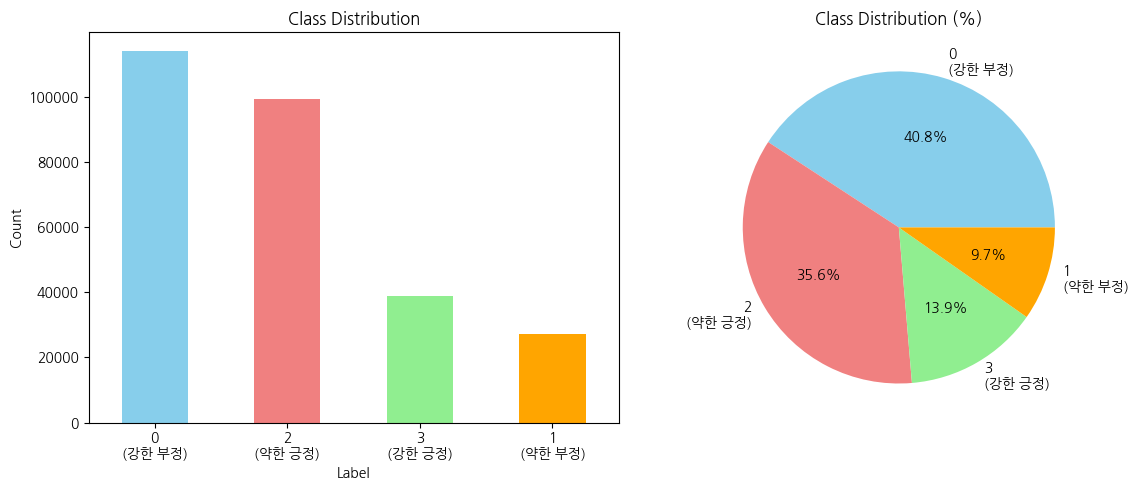

In [ ]:
# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 5))
colors = ["skyblue", "lightcoral", "lightgreen", "orange"]

plt.subplot(1, 2, 1)
class_counts.plot(kind="bar", color=colors[: len(class_counts)])
plt.title("Class Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=0)
# Add label mapping to x-axis
ax = plt.gca()
ax.set_xticklabels(
    [f"{label}\n({LABEL_MAPPING[label]})" for label in class_counts.index]
)

plt.subplot(1, 2, 2)
pie_labels = [f"{label}\n({LABEL_MAPPING[label]})" for label in class_counts.index]
plt.pie(
    class_counts.values,
    labels=pie_labels,
    autopct="%1.1f%%",
    colors=colors[: len(class_counts)],
)
plt.title("Class Distribution (%)")

plt.tight_layout()
plt.show()


## ÏûÖÎ†• Î≥ÄÏàò Î∂ÑÏÑù

- ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ ÌôïÏù∏
- Ïù¥ÏÉÅÏπò ÌÉêÏßÄ


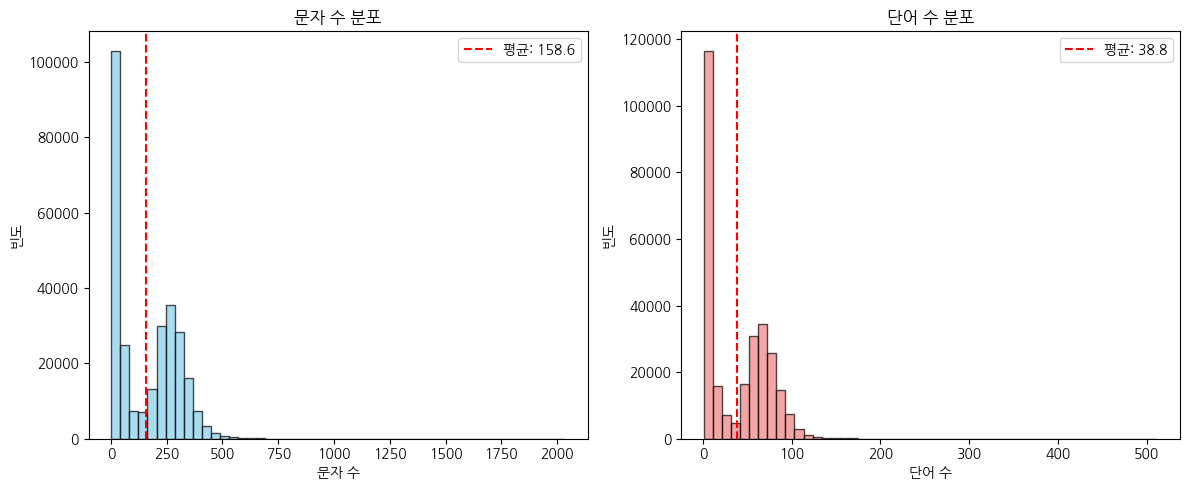

In [ ]:
# ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df["text_length"], bins=50, alpha=0.7, color="skyblue", edgecolor="black")
plt.title("Î¨∏Ïûê Ïàò Î∂ÑÌè¨")
plt.xlabel("Î¨∏Ïûê Ïàò")
plt.ylabel("ÎπàÎèÑ")
plt.axvline(
    df["text_length"].mean(),
    color="red",
    linestyle="--",
    label=f"ÌèâÍ∑†: {df['text_length'].mean():.1f}",
)
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df["word_count"], bins=50, alpha=0.7, color="lightcoral", edgecolor="black")
plt.title("Îã®Ïñ¥ Ïàò Î∂ÑÌè¨")
plt.xlabel("Îã®Ïñ¥ Ïàò")
plt.ylabel("ÎπàÎèÑ")
plt.axvline(
    df["word_count"].mean(),
    color="red",
    linestyle="--",
    label=f"ÌèâÍ∑†: {df['word_count'].mean():.1f}",
)
plt.legend()

plt.tight_layout()
plt.show()


# EDA (Explanatory Data Analysis)

## Îç∞Ïù¥ÌÑ∞ Í∞úÏöî Î∞è ÌíàÏßà Í≤ÄÏÇ¨

- Îç∞Ïù¥ÌÑ∞ÏÖã ÌòïÌÉú Î∞è Í∏∞Î≥∏ Ï†ïÎ≥¥
- Í≤∞Ï∏°Í∞í
- Ï§ëÎ≥µÍ∞í
- Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏

In [85]:
# Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¨Í∏∞ Î∞è Í∏∞Î≥∏ Ï†ïÎ≥¥ ÌôïÏù∏
print(f"Îç∞Ïù¥ÌÑ∞ÏÖã ÌòïÌÉú: {df.shape}")
print(f"Ìñâ Ïàò: {df.shape[0]}")
print(f"Ïó¥ Ïàò: {df.shape[1]}")
print(f"Ïó¥ Ïù¥Î¶Ñ: {list(df.columns)}")

# Í≤∞Ï∏°Í∞í ÌôïÏù∏
print("\nÍ≤∞Ï∏°Í∞í:")
print(df.isnull().sum())

# Ï§ëÎ≥µÍ∞í ÌôïÏù∏
print(f"\nÏ§ëÎ≥µ Î¶¨Î∑∞: {df['review'].duplicated().sum()}")
print(f"Ï§ëÎ≥µ Ìñâ: {df.duplicated().sum()}")

if df["review"].duplicated().sum() > 0:
    print("\nÏ§ëÎ≥µÎêú Î¶¨Î∑∞ ÏòàÏãú:")
    duplicated_reviews = df[df["review"].duplicated(keep=False)].sort_values("review")
    print(duplicated_reviews[["review", "label"]].head(10))

# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏
print("\nÎç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ:")
print(df.dtypes)

Îç∞Ïù¥ÌÑ∞ÏÖã ÌòïÌÉú: (279650, 4)
Ìñâ Ïàò: 279650
Ïó¥ Ïàò: 4
Ïó¥ Ïù¥Î¶Ñ: ['ID', 'review', 'label', 'type']

Í≤∞Ï∏°Í∞í:
ID        0
review    6
label     0
type      0
dtype: int64

Ï§ëÎ≥µ Î¶¨Î∑∞: 3350
Ï§ëÎ≥µ Ìñâ: 0

Ï§ëÎ≥µÎêú Î¶¨Î∑∞ ÏòàÏãú:
       review  label
112658      !      2
197409      !      0
235169    -_-      0
85131     -_-      0
140661    -_-      0
35114       0      1
187569      0      1
159660     0Ï†ê      0
217122     0Ï†ê      0
209801     0Ï†ê      0

Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ:
ID         int64
review    object
label      int64
type      object
dtype: object


## ÌÉÄÍ≤ü Î≥ÄÏàò Î∂ÑÏÑù

- ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ ÌôïÏù∏
- Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï ÌôïÏù∏

In [86]:
# ÎùºÎ≤® Îß§Ìïë Ï†ïÏùò
LABEL_MAPPING = {0: "Í∞ïÌïú Î∂ÄÏ†ï", 1: "ÏïΩÌïú Î∂ÄÏ†ï", 2: "ÏïΩÌïú Í∏çÏ†ï", 3: "Í∞ïÌïú Í∏çÏ†ï"}

In [87]:
# ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ Î∂ÑÏÑù
class_counts = df["label"].value_counts()
class_percentages = df["label"].value_counts(normalize=True) * 100

print("Class Distribution:")
print(class_counts)
print("\nClass percentages:")
for label, percentage in class_percentages.items():
    print(f"{label} ({LABEL_MAPPING[label]}): {percentage:.2f}%")

# ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Ï≤¥ÌÅ¨
imbalance_ratio = class_percentages.max() / class_percentages.min()
print(f"\nImbalance ratio: {imbalance_ratio:.2f}")
print("‚ö†Ô∏è Imbalanced" if imbalance_ratio > 3 else "‚úÖ Balanced")

Class Distribution:
label
0    114066
2     99416
3     38952
1     27216
Name: count, dtype: int64

Class percentages:
0 (Í∞ïÌïú Î∂ÄÏ†ï): 40.79%
2 (ÏïΩÌïú Í∏çÏ†ï): 35.55%
3 (Í∞ïÌïú Í∏çÏ†ï): 13.93%
1 (ÏïΩÌïú Î∂ÄÏ†ï): 9.73%

Imbalance ratio: 4.19
‚ö†Ô∏è Imbalanced


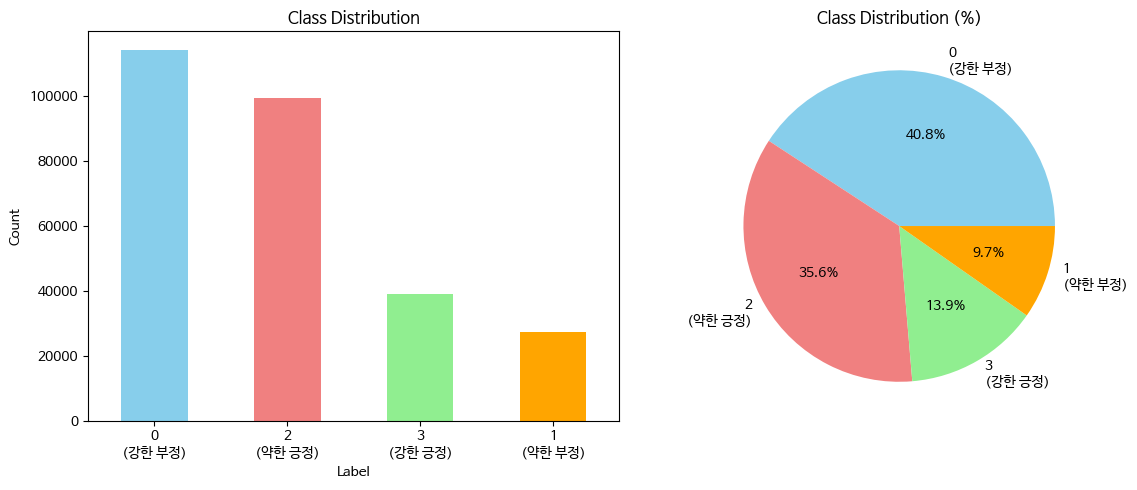

In [88]:
# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 5))
colors = ["skyblue", "lightcoral", "lightgreen", "orange"]

plt.subplot(1, 2, 1)
class_counts.plot(kind="bar", color=colors[: len(class_counts)])
plt.title("Class Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=0)
# Add label mapping to x-axis
ax = plt.gca()
ax.set_xticklabels(
    [f"{label}\n({LABEL_MAPPING[label]})" for label in class_counts.index]
)

plt.subplot(1, 2, 2)
pie_labels = [f"{label}\n({LABEL_MAPPING[label]})" for label in class_counts.index]
plt.pie(
    class_counts.values,
    labels=pie_labels,
    autopct="%1.1f%%",
    colors=colors[: len(class_counts)],
)
plt.title("Class Distribution (%)")

plt.tight_layout()
plt.show()

## ÏûÖÎ†• Î≥ÄÏàò Î∂ÑÏÑù

- ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ ÌôïÏù∏
- Ïù¥ÏÉÅÏπò ÌÉêÏßÄ

In [89]:
# ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∂ÑÏÑù
df["text_length"] = df["review"].str.len()
df["word_count"] = df["review"].str.split().str.len()

print("ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ ÌÜµÍ≥Ñ:")
print(f"Î¨∏Ïûê Ïàò: {df['text_length'].describe()}")
print(f"Îã®Ïñ¥ Ïàò: {df['word_count'].describe()}")

ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ ÌÜµÍ≥Ñ:
Î¨∏Ïûê Ïàò: count    279644.000000
mean        158.645210
std         137.147273
min           1.000000
25%          27.000000
50%         140.000000
75%         272.000000
max        2035.000000
Name: text_length, dtype: float64
Îã®Ïñ¥ Ïàò: count    279644.000000
mean         38.759294
std          34.666607
min           1.000000
25%           6.000000
50%          33.000000
75%          68.000000
max         512.000000
Name: word_count, dtype: float64


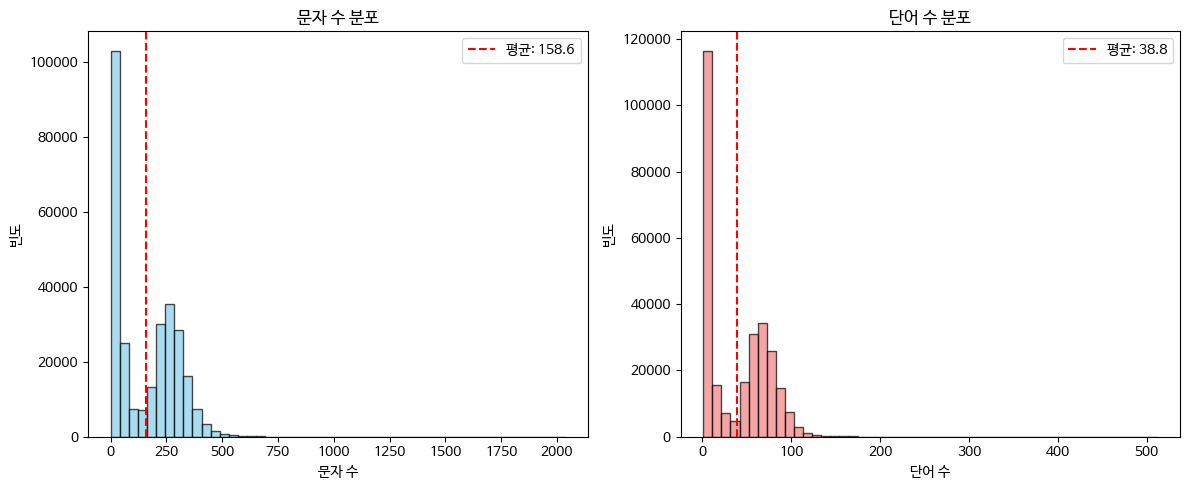

In [90]:
# ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df["text_length"], bins=50, alpha=0.7, color="skyblue", edgecolor="black")
plt.title("Î¨∏Ïûê Ïàò Î∂ÑÌè¨")
plt.xlabel("Î¨∏Ïûê Ïàò")
plt.ylabel("ÎπàÎèÑ")
plt.axvline(
    df["text_length"].mean(),
    color="red",
    linestyle="--",
    label=f"ÌèâÍ∑†: {df['text_length'].mean():.1f}",
)
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df["word_count"], bins=50, alpha=0.7, color="lightcoral", edgecolor="black")
plt.title("Îã®Ïñ¥ Ïàò Î∂ÑÌè¨")
plt.xlabel("Îã®Ïñ¥ Ïàò")
plt.ylabel("ÎπàÎèÑ")
plt.axvline(
    df["word_count"].mean(),
    color="red",
    linestyle="--",
    label=f"ÌèâÍ∑†: {df['word_count'].mean():.1f}",
)
plt.legend()

plt.tight_layout()
plt.show()

In [91]:
# Ïù¥ÏÉÅÏπò ÌÉêÏßÄ (Îß§Ïö∞ ÏßßÍ±∞ÎÇò Í∏¥ ÌÖçÏä§Ìä∏)
short_threshold = 10
long_threshold = 100

short_count = (df["text_length"] < short_threshold).sum()
long_count = (df["text_length"] > long_threshold).sum()

print(
    f"\nÏù¥ÏÉÅÏπò: ÏßßÏùÄ Î¶¨Î∑∞(<{short_threshold}Ïûê) {short_count}Í∞ú, Í∏¥ Î¶¨Î∑∞(>{long_threshold}Ïûê) {long_count}Í∞ú"
)

# ÏßßÏùÄ Î¶¨Î∑∞ ÏòàÏãú ÌôïÏù∏
if short_count > 0:
    short_reviews = df[df["text_length"] < short_threshold]
    print("\nÏßßÏùÄ Î¶¨Î∑∞ ÏòàÏãú (ÏÉÅÏúÑ 5Í∞ú):")
    for i, (idx, row) in enumerate(short_reviews.head(5).iterrows(), 1):
        print(
            f"  {i}. '{row['review']}' (Í∏∏Ïù¥: {row['text_length']}Ïûê, ÎùºÎ≤®: {row['label']})"
        )

# Í∏¥ Î¶¨Î∑∞ ÏòàÏãú ÌôïÏù∏
if long_count > 0:
    long_reviews = df[df["text_length"] > long_threshold]
    print("\nÍ∏¥ Î¶¨Î∑∞ ÏòàÏãú (ÏÉÅÏúÑ 3Í∞ú):")
    for i, (idx, row) in enumerate(long_reviews.head(3).iterrows(), 1):
        preview = (
            row["review"][:100] + "..." if len(row["review"]) > 100 else row["review"]
        )
        print(
            f"  {i}. '{preview}' (Í∏∏Ïù¥: {row['text_length']}Ïûê, ÎùºÎ≤®: {row['label']})"
        )


Ïù¥ÏÉÅÏπò: ÏßßÏùÄ Î¶¨Î∑∞(<10Ïûê) 12097Í∞ú, Í∏¥ Î¶¨Î∑∞(>100Ïûê) 147918Í∞ú

ÏßßÏùÄ Î¶¨Î∑∞ ÏòàÏãú (ÏÉÅÏúÑ 5Í∞ú):
  1. 'Ïã∏Î¨ºÍ≥† Î≥¥Ïûê' (Í∏∏Ïù¥: 6.0Ïûê, ÎùºÎ≤®: 2)
  2. 'ÏßÑÏßú Î≥ÑÎ°úÎã§' (Í∏∏Ïù¥: 6.0Ïûê, ÎùºÎ≤®: 0)
  3. 'Î¨¥Í∞ÄÏπò' (Í∏∏Ïù¥: 3.0Ïûê, ÎùºÎ≤®: 0)
  4. 'Ïû¨ÎØ∏ÏóÜÎã§' (Í∏∏Ïù¥: 4.0Ïûê, ÎùºÎ≤®: 0)
  5. 'Ï†ïÏ†êÏùò Ï†ÑÏüÅÏòÅÌôî' (Í∏∏Ïù¥: 8.0Ïûê, ÎùºÎ≤®: 2)

Í∏¥ Î¶¨Î∑∞ ÏòàÏãú (ÏÉÅÏúÑ 3Í∞ú):
  1. 'Ïù¥ ÏòÅÌôîÎäî Ï†ïÎßê Ïó¨ÏÑ±Ïùò Í∞ïÏù∏Ìï®Í≥º ÌûòÏùÑ Ï†úÎåÄÎ°ú Î≥¥Ïó¨Ï£ºÎäî ÏûëÌíàÏù¥ÏóàÏñ¥Ïöî! Ï£ºÏù∏Í≥µÏù¥ ÏûêÍ∏∞ ÏûêÏã†ÏùÑ Ï∞æÏïÑÍ∞ÄÍ≥†, Í∞ÄÎ∂ÄÏû•Ï†ÅÏù∏ ÏÇ¨Ìöå Íµ¨Ï°∞Ïóê ÎßûÏÑúÎäî Î™®ÏäµÏù¥ ÎÑàÎ¨¥ Î©ãÏûàÏóàÏñ¥Ïöî. ÌäπÌûà ÎßàÏßÄÎßâ Ïû•Î©¥ÏóêÏÑú Í∑∏...' (Í∏∏Ïù¥: 280.0Ïûê, ÎùºÎ≤®: 2)
  2. 'ÌÅ¨Î¶¨Ïä§ÎßàÏä§ ÏãúÏ¶åÏóî Î¨¥Ï°∞Í±¥ Ìôà ÏïåÎ°†Ïù¥Ï£†! Îß•Ïª¨Î¶¨ Ïª¨ÌÇ®Ïù¥ Ïó∞Í∏∞Ìïú ÏºÄÎπàÏùò Ïû¨ÏπòÏûàÍ≥† Ï≤úÎ∞©ÏßÄÏ∂ïÏù∏ Î™®ÏäµÏùÑ Î≥¥Î©¥ÏÑú ÏõÉÏùåÍΩÉÏù¥ ÌîºÏßÄ ÏïäÏùÄ Ïù¥Í∞Ä ÏóÜÏùÑ Í±∞ÏòàÏöî. ÌäπÌûà Í∑∏ Îëê Î™ÖÏùò ÎèÑÎëëÎì§Í≥ºÏùò ÏóêÌîºÏÜåÎìúÎì§...' (Í∏∏Ïù¥: 252.0Ïûê, ÎùºÎ≤®: 2)
  3. 'ÏßÑÏßú Ïù¥ ÏòÅÌô

## ÌÖçÏä§Ìä∏ ÌíàÏßà ÌèâÍ∞Ä

- ÎπÑÏñ¥ÏûàÍ±∞ÎÇò nullÏù∏ ÌÖçÏä§Ìä∏ ÌôïÏù∏
- Ïû†Ïû¨Ï†ÅÏù∏ Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Î¨∏Ï†ú ÏãùÎ≥Ñ
- Ïñ∏Ïñ¥ ÏùºÍ¥ÄÏÑ± ÌôïÏù∏

In [92]:
# 1. Null Í∞í Î∞è Îπà ÌÖçÏä§Ìä∏ ÌôïÏù∏
null_count = df["review"].isnull().sum()
empty_texts = df["review"].str.strip().eq("").sum()
whitespace_only = df["review"].str.isspace().sum()

print(f"Null Í∞í: {null_count}Í∞ú")
print(f"Îπà ÌÖçÏä§Ìä∏: {empty_texts}Í∞ú")
print(f"Í≥µÎ∞±Îßå ÏûàÎäî ÌÖçÏä§Ìä∏: {whitespace_only}Í∞ú")

# 2. Ïû†Ïû¨Ï†ÅÏù∏ Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Î¨∏Ï†ú ÏãùÎ≥Ñ
# 2-1. Ï§ëÎ≥µ ÌÖçÏä§Ìä∏ ÌôïÏù∏ - ÎèôÏùºÌïú Î¶¨Î∑∞Í∞Ä Ïó¨Îü¨ Î≤à Îì±Ïû•ÌïòÎäîÏßÄ ÌôïÏù∏
duplicate_count = df["review"].duplicated().sum()
print(f"Ï§ëÎ≥µ Î¶¨Î∑∞: {duplicate_count}Í∞ú")

# 2-2. ÌäπÏàò Î¨∏ÏûêÎßåÏúºÎ°ú Íµ¨ÏÑ±Îêú ÌÖçÏä§Ìä∏ ÌôïÏù∏ - ÏùòÎØ∏ÏûàÎäî ÎÇ¥Ïö©Ïù¥ ÏóÜÎäî Î¶¨Î∑∞ ÌÉêÏßÄ
special_char_only = df["review"].str.match(r"^[^\w\sÍ∞Ä-Ìû£]+$", na=False).sum()
print(f"ÌäπÏàòÎ¨∏ÏûêÎßå ÏûàÎäî Î¶¨Î∑∞: {special_char_only}Í∞ú")

# 2-3. Ïà´ÏûêÎßåÏúºÎ°ú Íµ¨ÏÑ±Îêú ÌÖçÏä§Ìä∏ ÌôïÏù∏ - ÌèâÏ†êÏù¥ÎÇò ÏùòÎØ∏ÏóÜÎäî Ïà´ÏûêÎ°úÎßå Ïù¥Î£®Ïñ¥ÏßÑ Î¶¨Î∑∞ ÌÉêÏßÄ
digit_only = df["review"].str.match(r"^\d+$", na=False).sum()
print(f"Ïà´ÏûêÎßå ÏûàÎäî Î¶¨Î∑∞: {digit_only}Í∞ú")

# 3. Ïñ∏Ïñ¥ ÏùºÍ¥ÄÏÑ± ÌôïÏù∏ (ÌïúÍµ≠Ïñ¥ Îç∞Ïù¥ÌÑ∞ÏÖã ÌäπÏÑ±)
# ÌïúÍ∏ÄÏù¥ Ìè¨Ìï®ÎêòÏßÄ ÏïäÏùÄ ÌÖçÏä§Ìä∏ ÌôïÏù∏ - ÏôÑÏÑ±Ìòï ÌïúÍ∏Ä, ÏûêÏùå, Î™®Ïùå Î™®Îëê Ìè¨Ìï®ÌïòÏó¨ Í≤ÄÏÇ¨
non_korean = ~df["review"].str.contains(r"[Í∞Ä-Ìû£„Ñ±-„Öé„Öè-„Ö£]", na=False)
non_korean_count = non_korean.sum()
print(f"ÌïúÍ∏ÄÏù¥ ÏóÜÎäî Î¶¨Î∑∞: {non_korean_count}Í∞ú")

# Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Ï¢ÖÌï© ÏöîÏïΩ
print("\n=== Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Ï¢ÖÌï© ÏöîÏïΩ ===")
total_issues = (
    null_count
    + empty_texts
    + whitespace_only
    + duplicate_count
    + special_char_only
    + digit_only
    + non_korean_count
)
print(f"Ï†ÑÏ≤¥ Î¶¨Î∑∞ Ïàò: {len(df):,}")
print(f"ÌíàÏßà Ïù¥ÏäàÍ∞Ä ÏûàÎäî Î¶¨Î∑∞ Ïàò: {total_issues:,}")
print(f"ÌíàÏßà Ïù¥Ïäà ÎπÑÏú®: {total_issues / len(df) * 100:.2f}%")
print(f"ÏñëÏßàÏùò Îç∞Ïù¥ÌÑ∞ ÎπÑÏú®: {(len(df) - total_issues) / len(df) * 100:.2f}%")

Null Í∞í: 6Í∞ú
Îπà ÌÖçÏä§Ìä∏: 0Í∞ú
Í≥µÎ∞±Îßå ÏûàÎäî ÌÖçÏä§Ìä∏: 0Í∞ú
Ï§ëÎ≥µ Î¶¨Î∑∞: 3350Í∞ú
ÌäπÏàòÎ¨∏ÏûêÎßå ÏûàÎäî Î¶¨Î∑∞: 88Í∞ú
Ïà´ÏûêÎßå ÏûàÎäî Î¶¨Î∑∞: 64Í∞ú
ÌïúÍ∏ÄÏù¥ ÏóÜÎäî Î¶¨Î∑∞: 1042Í∞ú

=== Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Ï¢ÖÌï© ÏöîÏïΩ ===
Ï†ÑÏ≤¥ Î¶¨Î∑∞ Ïàò: 279,650
ÌíàÏßà Ïù¥ÏäàÍ∞Ä ÏûàÎäî Î¶¨Î∑∞ Ïàò: 4,550
ÌíàÏßà Ïù¥Ïäà ÎπÑÏú®: 1.63%
ÏñëÏßàÏùò Îç∞Ïù¥ÌÑ∞ ÎπÑÏú®: 98.37%


In [93]:
# ÏÉÅÏÑ∏Ìïú ÏòàÏãúÎ•º Î≥¥Í≥† Ïã∂ÏúºÎ©¥ TrueÎ°ú Î≥ÄÍ≤ΩÌïòÏÑ∏Ïöî
VERBOSE = True

# Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Î∂ÑÏÑù Í≤∞Í≥ºÎ•º ÏòàÏãúÎ°ú ÌôïÏù∏Ìï¥Î≥¥Í∏∞
if VERBOSE:
    print("\n=== Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Ïù¥Ïäà ÏòàÏãú ===")

    # Ï§ëÎ≥µ Î¶¨Î∑∞ ÏòàÏãú (3Í∞ú)
    duplicated_reviews = df[df["review"].duplicated(keep=False)]
    if not duplicated_reviews.empty:
        print(f"\nÏ§ëÎ≥µ Î¶¨Î∑∞ ÏòàÏãú (Ï†ÑÏ≤¥ {len(duplicated_reviews)}Í∞ú Ï§ë 3Í∞ú):")
        for i, (idx, row) in enumerate(duplicated_reviews.head(3).iterrows()):
            print(f"  {i + 1}. ID {row['ID']}: {row['review']}")
    else:
        print("\nÏ§ëÎ≥µ Î¶¨Î∑∞Í∞Ä ÏóÜÏäµÎãàÎã§.")

    # ÌäπÏàòÎ¨∏ÏûêÎßå ÏûàÎäî Î¶¨Î∑∞ ÏòàÏãú (3Í∞ú)
    special_char_reviews = df[df["review"].str.match(r"^[^\w\sÍ∞Ä-Ìû£]+$", na=False)]
    if not special_char_reviews.empty:
        print(
            f"\nÌäπÏàòÎ¨∏ÏûêÎßå ÏûàÎäî Î¶¨Î∑∞ ÏòàÏãú (Ï†ÑÏ≤¥ {len(special_char_reviews)}Í∞ú Ï§ë 3Í∞ú):"
        )
        for i, (idx, row) in enumerate(special_char_reviews.head(3).iterrows()):
            print(f"  {i + 1}. ID {row['ID']}: '{row['review']}'")
    else:
        print("\nÌäπÏàòÎ¨∏ÏûêÎßå ÏûàÎäî Î¶¨Î∑∞Í∞Ä ÏóÜÏäµÎãàÎã§.")

    # Ïà´ÏûêÎßå ÏûàÎäî Î¶¨Î∑∞ ÏòàÏãú (3Í∞ú)
    digit_only_reviews = df[df["review"].str.match(r"^\d+$", na=False)]
    if not digit_only_reviews.empty:
        print(f"\nÏà´ÏûêÎßå ÏûàÎäî Î¶¨Î∑∞ ÏòàÏãú (Ï†ÑÏ≤¥ {len(digit_only_reviews)}Í∞ú Ï§ë 3Í∞ú):")
        for i, (idx, row) in enumerate(digit_only_reviews.head(3).iterrows()):
            print(f"  {i + 1}. ID {row['ID']}: '{row['review']}'")
    else:
        print("\nÏà´ÏûêÎßå ÏûàÎäî Î¶¨Î∑∞Í∞Ä ÏóÜÏäµÎãàÎã§.")

    # ÌïúÍ∏ÄÏù¥ ÏóÜÎäî Î¶¨Î∑∞ ÏòàÏãú (3Í∞ú)
    non_korean_reviews = df[~df["review"].str.contains(r"[Í∞Ä-Ìû£„Ñ±-„Öé„Öè-„Ö£]", na=False)]
    if not non_korean_reviews.empty:
        print(f"\nÌïúÍ∏ÄÏù¥ ÏóÜÎäî Î¶¨Î∑∞ ÏòàÏãú (Ï†ÑÏ≤¥ {len(non_korean_reviews)}Í∞ú Ï§ë 3Í∞ú):")
        for i, (idx, row) in enumerate(non_korean_reviews.head(3).iterrows()):
            print(f"  {i + 1}. ID {row['ID']}: '{row['review']}'")
    else:
        print("\nÌïúÍ∏ÄÏù¥ ÏóÜÎäî Î¶¨Î∑∞Í∞Ä ÏóÜÏäµÎãàÎã§.")
else:
    print("\nÏÉÅÏÑ∏Ìïú ÏòàÏãúÎ•º Î≥¥Î†§Î©¥ VERBOSE = TrueÎ°ú Î≥ÄÍ≤ΩÌïòÏó¨ ÏÖÄÏùÑ Îã§Ïãú Ïã§ÌñâÌïòÏÑ∏Ïöî.")


=== Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Ïù¥Ïäà ÏòàÏãú ===

Ï§ëÎ≥µ Î¶¨Î∑∞ ÏòàÏãú (Ï†ÑÏ≤¥ 4398Í∞ú Ï§ë 3Í∞ú):
  1. ID 134: Ïû¨ÎØ∏ÏóÜÎã§
  2. ID 171: Î≥ºÎßåÌñàÎã§.
  3. ID 172: Íµ≥

ÌäπÏàòÎ¨∏ÏûêÎßå ÏûàÎäî Î¶¨Î∑∞ ÏòàÏãú (Ï†ÑÏ≤¥ 88Í∞ú Ï§ë 3Í∞ú):
  1. ID 3439: ';;'
  2. ID 3685: '...?.?...??....'
  3. ID 14300: '"'

Ïà´ÏûêÎßå ÏûàÎäî Î¶¨Î∑∞ ÏòàÏãú (Ï†ÑÏ≤¥ 64Í∞ú Ï§ë 3Í∞ú):
  1. ID 1722: '1234567890'
  2. ID 5232: '2'
  3. ID 11775: '1'

ÌïúÍ∏ÄÏù¥ ÏóÜÎäî Î¶¨Î∑∞ ÏòàÏãú (Ï†ÑÏ≤¥ 1042Í∞ú Ï§ë 3Í∞ú):
  1. ID 123: 'good good!^^'
  2. ID 1722: '1234567890'
  3. ID 2094: 'Very interesting'


## ÌÅ¥ÎûòÏä§Î≥Ñ ÌÖçÏä§Ìä∏ ÌäπÏÑ±

- ÌÅ¥ÎûòÏä§Î≥Ñ Î¶¨Î∑∞ Í≤ÄÌÜ†
- ÌÅ¥ÎûòÏä§Î≥Ñ ÌèâÍ∑† ÌÖçÏä§Ìä∏ Í∏∏Ïù¥
- ÌÅ¥ÎûòÏä§Î≥Ñ Ïñ¥Ìúò Îã§ÏñëÏÑ±
- ÌÅ¥ÎûòÏä§Î≥Ñ Í≥µÌÜµ Ìå®ÌÑ¥Ïù¥ÎÇò ÌÇ§ÏõåÎìú

In [94]:
# Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ ÏÉòÌîå Î¶¨Î∑∞ Í≤ÄÌÜ†
print("Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ ÏÉòÌîå Î¶¨Î∑∞:")
for label in df["label"].unique():
    print(f"\n[{label}] {LABEL_MAPPING[label]} ÏÉòÌîå:")
    samples = df[df["label"] == label]["review"].head(2)
    for i, sample in enumerate(samples, 1):
        print(f"  {i}. {sample[:100]}{'...' if len(sample) > 100 else ''}")

Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ ÏÉòÌîå Î¶¨Î∑∞:

[2] ÏïΩÌïú Í∏çÏ†ï ÏÉòÌîå:
  1. Ïù¥ ÏòÅÌôîÎäî Ï†ïÎßê Ïó¨ÏÑ±Ïùò Í∞ïÏù∏Ìï®Í≥º ÌûòÏùÑ Ï†úÎåÄÎ°ú Î≥¥Ïó¨Ï£ºÎäî ÏûëÌíàÏù¥ÏóàÏñ¥Ïöî! Ï£ºÏù∏Í≥µÏù¥ ÏûêÍ∏∞ ÏûêÏã†ÏùÑ Ï∞æÏïÑÍ∞ÄÍ≥†, Í∞ÄÎ∂ÄÏû•Ï†ÅÏù∏ ÏÇ¨Ìöå Íµ¨Ï°∞Ïóê ÎßûÏÑúÎäî Î™®ÏäµÏù¥ ÎÑàÎ¨¥ Î©ãÏûàÏóàÏñ¥Ïöî. ÌäπÌûà ÎßàÏßÄÎßâ Ïû•Î©¥ÏóêÏÑú Í∑∏...
  2. ÌÅ¨Î¶¨Ïä§ÎßàÏä§ ÏãúÏ¶åÏóî Î¨¥Ï°∞Í±¥ Ìôà ÏïåÎ°†Ïù¥Ï£†! Îß•Ïª¨Î¶¨ Ïª¨ÌÇ®Ïù¥ Ïó∞Í∏∞Ìïú ÏºÄÎπàÏùò Ïû¨ÏπòÏûàÍ≥† Ï≤úÎ∞©ÏßÄÏ∂ïÏù∏ Î™®ÏäµÏùÑ Î≥¥Î©¥ÏÑú ÏõÉÏùåÍΩÉÏù¥ ÌîºÏßÄ ÏïäÏùÄ Ïù¥Í∞Ä ÏóÜÏùÑ Í±∞ÏòàÏöî. ÌäπÌûà Í∑∏ Îëê Î™ÖÏùò ÎèÑÎëëÎì§Í≥ºÏùò ÏóêÌîºÏÜåÎìúÎì§...

[1] ÏïΩÌïú Î∂ÄÏ†ï ÏÉòÌîå:
  1. Ïñ¥Îäê Î∂ÄÏû£Ïßë ÎèÑÎ†®ÎãòÏùò Ï≤†ÏóÜÎäî ÌñâÍ∞Å
  2. Î¶¨ÏñºÍ≥º Ïä§ÏºÄÏùºÏùÄ ÏûàÎã§. ÌïòÏßÄÎßå ÏòÅÌôîÏ†ÅÏù∏ Ïû¨ÎØ∏Îäî ÏóÜÎäîÍ≤ÉÏù¥ Î¨∏Ï†ú

[0] Í∞ïÌïú Î∂ÄÏ†ï ÏÉòÌîå:
  1. ÏôúÏù¥Î†áÍ≤å Ïû¨ÎØ∏Í∞ÄÏóÜÎÉê ÏõêÎèÑ Î≥ÑÎ°úÏòÄÏßÄÎßå ÏõêÎ≥¥Îã§ Îçî Ïû¨ÎØ∏ÏóÜÎÑ§
  2. Ï∞∏ÎÇò„Öã„ÖãÏù¥Í≤å Î¨¥Ïä® ÎìúÎùºÎßà ÏµúÏ¥à ÎÆ§ÏßÄÏª¨ÎìúÎùºÎßàÏïº Ïù¥Í≤åÎ¨¥Ïä®„Öã„ÖãÍ±ç Îã§Î•∏ ÎìúÎùºÎßàÎûë ÎòëÍ∞ôÍµ¨Îßå ÏÇ¨ÎûëÏù¥ÏïºÍ∏∞Îßå ÌïòÍ

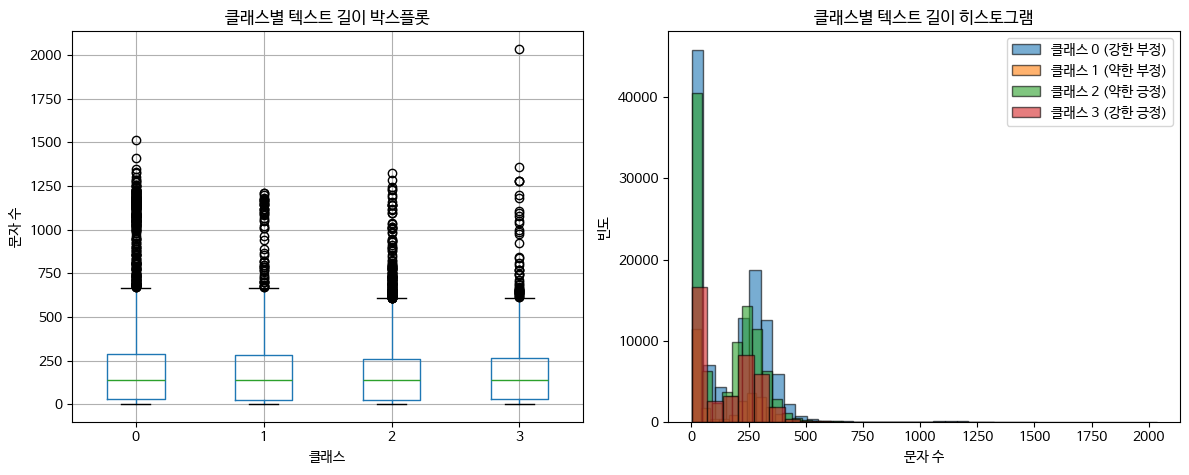

In [95]:
# ÌÅ¥ÎûòÏä§Î≥Ñ ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∂ÑÌè¨ Î∂ÑÏÑù
plt.figure(figsize=(12, 5))

# Î∞ïÏä§ÌîåÎ°Ø
plt.subplot(1, 2, 1)
df.boxplot(column="text_length", by="label", ax=plt.gca())
plt.title("ÌÅ¥ÎûòÏä§Î≥Ñ ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∞ïÏä§ÌîåÎ°Ø")
plt.xlabel("ÌÅ¥ÎûòÏä§")
plt.ylabel("Î¨∏Ïûê Ïàò")
plt.suptitle("")  # Í∏∞Î≥∏ Ï†úÎ™© Ï†úÍ±∞

# Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ ÌûàÏä§ÌÜ†Í∑∏Îû®
plt.subplot(1, 2, 2)
for label in sorted(df["label"].unique()):
    class_data = df[df["label"] == label]
    plt.hist(
        class_data["text_length"],
        bins=30,
        alpha=0.6,
        label=f"ÌÅ¥ÎûòÏä§ {label} ({LABEL_MAPPING[label]})",
        edgecolor="black",
    )
plt.title("ÌÅ¥ÎûòÏä§Î≥Ñ ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ ÌûàÏä§ÌÜ†Í∑∏Îû®")
plt.xlabel("Î¨∏Ïûê Ïàò")
plt.ylabel("ÎπàÎèÑ")
plt.legend()

plt.tight_layout()
plt.show()

In [96]:
# ÌÅ¥ÎûòÏä§Î≥Ñ Ïñ¥Ìúò Îã§ÏñëÏÑ± Î∂ÑÏÑù
print("\nÌÅ¥ÎûòÏä§Î≥Ñ Ïñ¥Ìúò Îã§ÏñëÏÑ±:")
for class_name in sorted(df["label"].unique()):
    class_data = df[df["label"] == class_name]
    # ÌÅ¥ÎûòÏä§Î≥Ñ Ï†ÑÏ≤¥ ÌÖçÏä§Ìä∏ Í≤∞Ìï©
    all_text = " ".join(class_data["review"].astype(str))
    words = all_text.split()
    unique_words = set(words)

    # Type-Token Ratio (Ïñ¥Ìúò Îã§ÏñëÏÑ± ÏßÄÌëú)
    ttr = len(unique_words) / len(words) if len(words) > 0 else 0

    print(
        f"  {class_name} ({LABEL_MAPPING[class_name]}): Ï¥ù Îã®Ïñ¥ {len(words)}Í∞ú, Í≥†Ïú† Îã®Ïñ¥ {len(unique_words)}Í∞ú, TTR: {ttr:.3f}"
    )


ÌÅ¥ÎûòÏä§Î≥Ñ Ïñ¥Ìúò Îã§ÏñëÏÑ±:
  0 (Í∞ïÌïú Î∂ÄÏ†ï): Ï¥ù Îã®Ïñ¥ 4651683Í∞ú, Í≥†Ïú† Îã®Ïñ¥ 293133Í∞ú, TTR: 0.063
  1 (ÏïΩÌïú Î∂ÄÏ†ï): Ï¥ù Îã®Ïñ¥ 1049950Í∞ú, Í≥†Ïú† Îã®Ïñ¥ 97455Í∞ú, TTR: 0.093
  2 (ÏïΩÌïú Í∏çÏ†ï): Ï¥ù Îã®Ïñ¥ 3654003Í∞ú, Í≥†Ïú† Îã®Ïñ¥ 240734Í∞ú, TTR: 0.066
  3 (Í∞ïÌïú Í∏çÏ†ï): Ï¥ù Îã®Ïñ¥ 1483174Í∞ú, Í≥†Ïú† Îã®Ïñ¥ 124439Í∞ú, TTR: 0.084


In [97]:
# ÌÅ¥ÎûòÏä§Î≥Ñ Í≥µÌÜµ ÌÇ§ÏõåÎìú Î∂ÑÏÑù
print("\nÌÅ¥ÎûòÏä§Î≥Ñ ÏÉÅÏúÑ ÎπàÏ∂ú Îã®Ïñ¥ (Î∂àÏö©Ïñ¥ Ï†úÏô∏):")

# ÌïúÍµ≠Ïñ¥ Î∂àÏö©Ïñ¥ Î¶¨Ïä§Ìä∏ ÌôïÏû•
stopwords = [
    # "ÏùÄ",
    # "Îäî",
    # "Ïù¥",
    # "Í∞Ä",
    # "ÏùÑ",
    # "Î•º",
    # "Ïùò",
    # "Ïóê",
    # "ÏôÄ",
    # "Í≥º",
    # "ÎèÑ",
    # "Î°ú",
    # "ÏúºÎ°ú",
    # "ÏóêÏÑú",
    # "Ìïú",
    # "Í∑∏",
    # "Í≤É",
    # "Í∑∏Í≤É",
    # "Ïù¥Í≤É",
    # "Ï†ÄÍ≤É",
    # "Í∑∏Î¶¨Í≥†",
    # "Í∑∏Îü∞Îç∞",
    # "ÌïòÏßÄÎßå",
    # "Í∑∏Îü¨ÎÇò",
    # "ÏûàÎã§",
    # "ÏóÜÎã§",
    # "ÎêòÎã§",
    # "ÌïòÎã§",
    # "Ïù¥Îã§",
    # "ÏïÑÎãàÎã§",
    # "Í∞ôÎã§",
    # "ÎßéÎã§",
    # "Ï¢ãÎã§",
    # "ÎÇòÏÅòÎã§",
    # "Ïàò",
    # "Îïå",
    # "Í≥≥",
    # "ÏÇ¨Îûå",
    # "Í≤ÉÎì§",
    # "Ï†ïÎßê",
    # "ÎÑàÎ¨¥",
    # "Îß§Ïö∞",
    # "ÏïÑÏ£º",
    # "Ï∞∏",
    # "Ï¢Ä",
]

for class_name in sorted(df["label"].unique()):
    class_data = df[df["label"] == class_name]
    all_text = " ".join(class_data["review"].astype(str))

    # Îã®Ïñ¥ Ï∂îÏ∂ú Î∞è ÌïÑÌÑ∞ÎßÅ (Í∏∏Ïù¥ 2 Ïù¥ÏÉÅ, Î∂àÏö©Ïñ¥ Ï†úÏô∏)
    words = [
        word
        for word in all_text.split()
        if word not in stopwords and len(word) >= 2 and word.isalpha()
    ]

    # Îã®Ïñ¥ ÎπàÎèÑ Í≥ÑÏÇ∞
    word_counts = Counter(words)
    top_words = word_counts.most_common(10)  # ÏÉÅÏúÑ 10Í∞úÎ°ú ÏßÄÏ†ï

    print(
        f"\n{class_name} ({LABEL_MAPPING[class_name]}) - Ï¥ù {len(class_data)}Í∞ú ÏÉòÌîå:"
    )
    for i, (word, count) in enumerate(top_words, 1):
        percentage = (count / len(words)) * 100 if len(words) > 0 else 0
        print(f"  {i:2d}. '{word}': {count}Ìöå ({percentage:.1f}%)")


ÌÅ¥ÎûòÏä§Î≥Ñ ÏÉÅÏúÑ ÎπàÏ∂ú Îã®Ïñ¥ (Î∂àÏö©Ïñ¥ Ï†úÏô∏):

0 (Í∞ïÌïú Î∂ÄÏ†ï) - Ï¥ù 114066Í∞ú ÏÉòÌîå:
   1. 'ÎÑàÎ¨¥': 106022Ìöå (3.2%)
   2. 'ÏßÑÏßú': 82753Ìöå (2.5%)
   3. 'Î≥¥Îäî': 55270Ìöå (1.7%)
   4. 'Ï†ïÎßê': 52786Ìöå (1.6%)
   5. 'Ïù¥Îü∞': 52545Ìöå (1.6%)
   6. 'ÏòÅÌôî': 49829Ìöå (1.5%)
   7. 'ÏòÅÌôîÎäî': 44978Ìöå (1.4%)
   8. 'Î≥¥Í≥†': 44776Ìöå (1.4%)
   9. 'ÏòÅÌôîÎ•º': 40348Ìöå (1.2%)
  10. 'ÎÇ¥ÎÇ¥': 39208Ìöå (1.2%)

1 (ÏïΩÌïú Î∂ÄÏ†ï) - Ï¥ù 27216Í∞ú ÏÉòÌîå:
   1. 'ÎÑàÎ¨¥': 16454Ìöå (2.2%)
   2. 'Î≥¥Í≥†': 10499Ìöå (1.4%)
   3. '„Ö†„Ö†': 8538Ìöå (1.1%)
   4. 'Î≠îÍ∞Ä': 7251Ìöå (1.0%)
   5. 'ÏòÅÌôî': 7061Ìöå (0.9%)
   6. 'Î≥¥Îäî': 6857Ìöå (0.9%)
   7. 'ÏßÑÏßú': 6833Ìöå (0.9%)
   8. 'Ï†ïÎßê': 6658Ìöå (0.9%)
   9. 'Í∑∏ÎÉ•': 6467Ìöå (0.9%)
  10. 'ÏòÅÌôîÎäî': 6200Ìöå (0.8%)

2 (ÏïΩÌïú Í∏çÏ†ï) - Ï¥ù 99416Í∞ú ÏÉòÌîå:
   1. 'ÏßÑÏßú': 60021Ìöå (2.3%)
   2. 'Ï†ïÎßê': 56003Ìöå (2.1%)
   3. 'ÎÑàÎ¨¥': 45092Ìöå (1.7%)
   4. 'ÏòÅÌôî': 34369Ìöå (1.3%)
   5. 'Î≥¥Îäî': 29527Ìöå (1.1%)
   6. 'ÌäπÌûà': 

# Data/Feature Engineering

## ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ Î∞è Ï†ïÎ¶¨

- Í∏∞Î≥∏ ÌÖçÏä§Ìä∏ Ï†ïÎ¶¨ (ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞, Í≥µÎ∞± Ï†ïÍ∑úÌôî)
- ÌïÑÏöîÏãú ÌïúÍµ≠Ïñ¥ ÌäπÌôî Ï†ÑÏ≤òÎ¶¨ Ï≤òÎ¶¨
- Îß§Ïö∞ ÏßßÍ±∞ÎÇò Í∏¥ ÌÖçÏä§Ìä∏ Ï†úÍ±∞ ÎòêÎäî Ï≤òÎ¶¨
- Ï§ëÎ≥µ Ï†úÍ±∞

In [98]:
# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Î•º ÏúÑÌïú Î≥µÏÇ¨Î≥∏ ÏÉùÏÑ±
df_processed = df[["ID", "label", "review"]].copy()

print(f"ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¨Í∏∞: {len(df_processed):,}Í∞ú")

df_processed.head()

ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¨Í∏∞: 279,650Í∞ú


ID  label                                             review
0   0      2  Ïù¥ ÏòÅÌôîÎäî Ï†ïÎßê Ïó¨ÏÑ±Ïùò Í∞ïÏù∏Ìï®Í≥º ÌûòÏùÑ Ï†úÎåÄÎ°ú Î≥¥Ïó¨Ï£ºÎäî ÏûëÌíàÏù¥ÏóàÏñ¥Ïöî! Ï£ºÏù∏Í≥µÏù¥ ÏûêÍ∏∞ ...
1   1      1                                 Ïñ¥Îäê Î∂ÄÏû£Ïßë ÎèÑÎ†®ÎãòÏùò Ï≤†ÏóÜÎäî ÌñâÍ∞Å
2   3      0                     ÏôúÏù¥Î†áÍ≤å Ïû¨ÎØ∏Í∞ÄÏóÜÎÉê ÏõêÎèÑ Î≥ÑÎ°úÏòÄÏßÄÎßå ÏõêÎ≥¥Îã§ Îçî Ïû¨ÎØ∏ÏóÜÎÑ§
3   4      2  ÌÅ¨Î¶¨Ïä§ÎßàÏä§ ÏãúÏ¶åÏóî Î¨¥Ï°∞Í±¥ Ìôà ÏïåÎ°†Ïù¥Ï£†! Îß•Ïª¨Î¶¨ Ïª¨ÌÇ®Ïù¥ Ïó∞Í∏∞Ìïú ÏºÄÎπàÏùò Ïû¨ÏπòÏûàÍ≥† Ï≤úÎ∞©ÏßÄ...
4   5      0  Ï∞∏ÎÇò„Öã„ÖãÏù¥Í≤å Î¨¥Ïä® ÎìúÎùºÎßà ÏµúÏ¥à ÎÆ§ÏßÄÏª¨ÎìúÎùºÎßàÏïº Ïù¥Í≤åÎ¨¥Ïä®„Öã„ÖãÍ±ç Îã§Î•∏ ÎìúÎùºÎßàÎûë ÎòëÍ∞ôÍµ¨Îßå ...

In [99]:
def clean_data_quality(df, text_col='review', label_col='label', id_col='ID'):
    """
    Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Í≤ÄÏÇ¨ Î∞è Î¨∏Ï†úÍ∞Ä ÏûàÎäî Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞
    
    Args:
        df: ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
        text_col: ÌÖçÏä§Ìä∏ Ïª¨ÎüºÎ™Ö
        label_col: ÎùºÎ≤® Ïª¨ÎüºÎ™Ö  
        id_col: ID Ïª¨ÎüºÎ™Ö
    
    Returns:
        clean_df: ÌíàÏßà Î¨∏Ï†úÍ∞Ä Ï†úÍ±∞Îêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
        removed_info: Ï†úÍ±∞Îêú Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥
    """
    print(f"ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Ïàò: {len(df):,}Í∞ú")
    
    # 1. ÌíàÏßà Í≤ÄÏÇ¨
    null_mask = df[text_col].isnull()
    empty_mask = df[text_col].str.strip().eq("")
    whitespace_mask = df[text_col].str.isspace()
    duplicate_mask = df[text_col].duplicated()
    digit_only_mask = df[text_col].str.match(r"^\d+$", na=False)
    
    print(f"Null Í∞í: {null_mask.sum()}Í∞ú")
    print(f"Îπà ÌÖçÏä§Ìä∏: {empty_mask.sum()}Í∞ú") 
    print(f"Í≥µÎ∞±Îßå ÏûàÎäî ÌÖçÏä§Ìä∏: {whitespace_mask.sum()}Í∞ú")
    print(f"Ï§ëÎ≥µ Î¶¨Î∑∞: {duplicate_mask.sum()}Í∞ú")
    print(f"Ïà´ÏûêÎßå ÏûàÎäî Î¶¨Î∑∞: {digit_only_mask.sum()}Í∞ú")
    
    # 2. ÌíàÏßà Î¨∏Ï†úÍ∞Ä ÏûàÎäî Îç∞Ïù¥ÌÑ∞ ÎßàÏä§ÌÅ¨ ÏÉùÏÑ±
    quality_issues_mask = (
        null_mask | 
        empty_mask | 
        whitespace_mask | 
        duplicate_mask | 
        digit_only_mask 
    )
    
    # 3. ÌíàÏßà Î¨∏Ï†úÍ∞Ä ÏûàÎäî Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞
    clean_df = df[~quality_issues_mask].copy().reset_index(drop=True)
    removed_count = quality_issues_mask.sum()
    
    print(f"\n=== Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Í≤ÄÏÇ¨ Í≤∞Í≥º ===")
    print(f"Ï†úÍ±∞Îêú Îç∞Ïù¥ÌÑ∞: {removed_count:,}Í∞ú")
    print(f"ÎÇ®ÏùÄ Îç∞Ïù¥ÌÑ∞: {len(clean_df):,}Í∞ú")
    print(f"Îç∞Ïù¥ÌÑ∞ ÌíàÏßà ÎπÑÏú®: {len(clean_df) / len(df) * 100:.2f}%")
    
    # 4. Ï†úÍ±∞Îêú Îç∞Ïù¥ÌÑ∞Ïùò ÏÉÅÏÑ∏ Ï†ïÎ≥¥ Ï∂úÎ†•
    if removed_count > 0:
        print(f"\n=== Ï†úÍ±∞Îêú Îç∞Ïù¥ÌÑ∞ ÏÉÅÏÑ∏ Ï†ïÎ≥¥ ===")
        removed_data = df[quality_issues_mask]
        
        if null_mask.sum() > 0:
            print(f"Null Í∞í ÏÉòÌîå: {removed_data[null_mask][text_col].head(3).tolist()}")
        if empty_mask.sum() > 0:
            print(f"Îπà ÌÖçÏä§Ìä∏ ÏÉòÌîå: {removed_data[empty_mask][text_col].head(3).tolist()}")
        if whitespace_mask.sum() > 0:
            print(f"Í≥µÎ∞±Îßå ÏûàÎäî ÌÖçÏä§Ìä∏ ÏÉòÌîå: {removed_data[whitespace_mask][text_col].head(3).tolist()}")
        if duplicate_mask.sum() > 0:
            print(f"Ï§ëÎ≥µ Î¶¨Î∑∞ ÏÉòÌîå: {removed_data[duplicate_mask][text_col].head(3).tolist()}")
        if digit_only_mask.sum() > 0:
            print(f"Ïà´ÏûêÎßå ÏûàÎäî Î¶¨Î∑∞ ÏÉòÌîå: {removed_data[digit_only_mask][text_col].head(3).tolist()}")
    
    # 5. Ï†úÍ±∞Îêú Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥ Ï†ÄÏû•
    removed_info = {
        'total_removed': removed_count,
        'null_count': null_mask.sum(),
        'empty_count': empty_mask.sum(),
        'whitespace_count': whitespace_mask.sum(),
        'duplicate_count': duplicate_mask.sum(),
        'digit_only_count': digit_only_mask.sum()
    }
    
    return clean_df, removed_info

print("‚úÖ Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Í≤ÄÏÇ¨ Î∞è Ï†úÍ±∞ Ìï®Ïàò Ï†ïÏùò ÏôÑÎ£å")

‚úÖ Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Í≤ÄÏÇ¨ Î∞è Ï†úÍ±∞ Ìï®Ïàò Ï†ïÏùò ÏôÑÎ£å


In [100]:
df_processed, removed_info = clean_data_quality(df_processed)

print(f"\nÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞: {len(df_processed):,}Í∞ú")
print(f"Ï†ïÏ†úÎêú Îç∞Ïù¥ÌÑ∞: {len(df_clean):,}Í∞ú")
print(f"Ï†úÍ±∞Îêú Îç∞Ïù¥ÌÑ∞: {removed_info['total_removed']:,}Í∞ú")

ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Ïàò: 279,650Í∞ú


Null Í∞í: 6Í∞ú
Îπà ÌÖçÏä§Ìä∏: 0Í∞ú
Í≥µÎ∞±Îßå ÏûàÎäî ÌÖçÏä§Ìä∏: 0Í∞ú
Ï§ëÎ≥µ Î¶¨Î∑∞: 3350Í∞ú
Ïà´ÏûêÎßå ÏûàÎäî Î¶¨Î∑∞: 64Í∞ú

=== Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Í≤ÄÏÇ¨ Í≤∞Í≥º ===
Ï†úÍ±∞Îêú Îç∞Ïù¥ÌÑ∞: 3,379Í∞ú
ÎÇ®ÏùÄ Îç∞Ïù¥ÌÑ∞: 276,271Í∞ú
Îç∞Ïù¥ÌÑ∞ ÌíàÏßà ÎπÑÏú®: 98.79%

=== Ï†úÍ±∞Îêú Îç∞Ïù¥ÌÑ∞ ÏÉÅÏÑ∏ Ï†ïÎ≥¥ ===
Null Í∞í ÏÉòÌîå: [nan, nan, nan]
Ï§ëÎ≥µ Î¶¨Î∑∞ ÏÉòÌîå: ['Ïû¨ÎØ∏ÏóÜÎã§', 'Íµ≥', 'tv Ï†ÑÍ∏∞ÏÑ∏Í∞Ä ÏïÑÍπùÎã§!!!']
Ïà´ÏûêÎßå ÏûàÎäî Î¶¨Î∑∞ ÏÉòÌîå: ['1234567890', '2', '1']

ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞: 276,271Í∞ú
Ï†ïÏ†úÎêú Îç∞Ïù¥ÌÑ∞: 276,271Í∞ú
Ï†úÍ±∞Îêú Îç∞Ïù¥ÌÑ∞: 3,379Í∞ú


## ÌÖçÏä§Ìä∏ Ï†ïÍ∑úÌôî

- ÎåÄÏÜåÎ¨∏Ïûê Ï†ïÍ∑úÌôî (BERTÍ∞Ä Ï≤òÎ¶¨ÌïòÏßÄÎßå)
- Íµ¨ÎëêÏ†ê Ï≤òÎ¶¨
- ÌäπÏàòÎ¨∏Ïûê Ï≤òÎ¶¨
- URL/Ïù¥Î©îÏùº/Î©òÏÖò Ï†ïÎ¶¨ (ÏûàÎäî Í≤ΩÏö∞)

## ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏ Ïû¨Íµ¨ÏÑ±

- ÏïûÏÑú Ï†ïÏùòÌïú Ï†ÑÏ≤òÎ¶¨ Î∞è Ï†ïÍ∑úÌôî Ìï®ÏàòÎì§ÏùÑ ÌôúÏö©ÌïòÏó¨ Ïû¨ÏÇ¨Ïö© Í∞ÄÎä•Ìïú ÌååÏù¥ÌîÑÎùºÏù∏ Íµ¨ÏÑ±
- ÎòêÌïú ÌïôÏäµ/Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ Ïãú Îç∞Ïù¥ÌÑ∞ ÎàÑÏàò(Data Leakage)Î•º Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌïú Ï†ÑÎûµ Ìè¨Ìï®

Îç∞Ïù¥ÌÑ∞ ÎàÑÏàò Î∞©ÏßÄ Ï†ÑÎûµ:
- Ï†ÑÏ≤òÎ¶¨ ÌååÎùºÎØ∏ÌÑ∞Îäî ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎßå ÌïôÏäµ
- Í≤ÄÏ¶ù/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Îäî ÌïôÏäµÎêú ÌååÎùºÎØ∏ÌÑ∞Î°úÎßå Î≥ÄÌôò
- Î†àÏù¥Î∏î Ï†ïÎ≥¥Î•º ÌôúÏö©Ìïú Ï†ÑÏ≤òÎ¶¨Îäî ÌïôÏäµ ÏãúÏóêÎßå Ï†ÅÏö©

In [101]:
# ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏ ÌÅ¥ÎûòÏä§ Íµ¨ÏÑ±
class TextPreprocessingPipeline:
    """
    ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏ ÌÅ¥ÎûòÏä§
    - Í∏∞Î≥∏ Ï†ÑÏ≤òÎ¶¨ÏôÄ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò Í≥†Í∏â Ï†ÑÏ≤òÎ¶¨Î•º ÌÜµÌï© Í¥ÄÎ¶¨
    - Ïû¨ÏÇ¨Ïö© Í∞ÄÎä•ÌïòÍ≥† ÌôïÏû• Í∞ÄÎä•Ìïú Íµ¨Ï°∞
    """

    def __init__(self):
        self.is_fitted = False
        self.vocab_info = {}
        self.label_patterns = {}

    def basic_preprocess(self, texts):
        """Í∏∞Î≥∏ Ï†ÑÏ≤òÎ¶¨ (clean_text + normalize Í∏∞Îä•)"""
        processed_texts = []
        for text in texts:
            # Í∏∞Î≥∏ ÌÖçÏä§Ìä∏ Ï†ïÎ¶¨
            cleaned = self._clean_text(text)
            processed_texts.append(cleaned)
        return processed_texts

    def _clean_text(self, text):
        """Í∏∞Ï°¥ clean_text Ìï®Ïàò ÎÇ¥Ïö©"""
        if pd.isna(text):
            return ""

        text = str(text).strip()
        text = text.lower() # ÏÜåÎ¨∏Ïûê Î≥ÄÌôò
        text = self._remove_urls_emails_mentions(text) # URL, Ïù¥Î©îÏùº, Î©òÏÖò Ï†úÍ±∞
        text = self._normalize_punctuation(text)  # Íµ¨ÎëêÏ†ê Ï†ïÍ∑úÌôî
        #text = self._remove_incomplete_korean(text)
        text = self._normalize_emotion_expressions(text) # Í∞êÏ†ï ÌëúÌòÑ Ï†ïÍ∑úÌôî („Öã„Öã„Öã , „Öé„Öé„Öé)
        text = self._reduce_excessive_repetition(text) # Í≥ºÎèÑÌïú Î¨∏Ïûê Î∞òÎ≥µ Ï∂ïÏÜå (ÏïÑÏïÑÏïÑÏïÑÏïÑÏïÑÏïô -> ÏïÑÏïÑÏïÑÏïÑ)
        text = self._clean_special_characters(text) # ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞ (Ïù¥Î™®Ìã∞ÏΩò, ÌäπÏàòÍ∏∞Ìò∏)
        text = self._normalize_whitespace(text) # Í≥µÎ∞± Ï†ïÍ∑úÌôî (Ïó¨Îü¨ Í∞úÏùò Í≥µÎ∞± -> ÌïòÎÇòÏùò Í≥µÎ∞±)

        return text.strip()

    def fit(self, texts, labels=None):
        """ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°úÎ∂ÄÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ï†ïÎ≥¥ ÌïôÏäµ (ÌíàÏßà Í≤ÄÏÇ¨ Í∏∞Ï§Ä ÌïôÏäµ)"""

        self.is_fitted = True
        print("‚úì Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏ ÌïôÏäµ ÏôÑÎ£å")


    def transform(self, texts):
        """Ï†ÑÏ≤òÎ¶¨ Ï†ÅÏö© (ÌíàÏßà Î¨∏Ï†ú Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞ + ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨)"""
        if not self.is_fitted:
            print(
                "Warning: ÌååÏù¥ÌîÑÎùºÏù∏Ïù¥ ÌïôÏäµÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§. Í∏∞Î≥∏ Ï†ÑÏ≤òÎ¶¨Îßå Ï†ÅÏö©Ìï©ÎãàÎã§."
            )
            return self.basic_preprocess(texts)
        
        # ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ Ï†ÅÏö©
        return self.basic_preprocess(texts)

    def fit_transform(self, texts, labels=None):
        """ÌïôÏäµÍ≥º Î≥ÄÌôòÏùÑ ÎèôÏãúÏóê ÏàòÌñâ"""
        # 1. ÌïôÏäµ Îã®Í≥Ñ (ÌíàÏßà Í≤ÄÏÇ¨ Í∏∞Ï§Ä ÌïôÏäµ)
        self.fit(texts, labels)
        
        # 2. Î≥ÄÌôò Îã®Í≥Ñ (ÌíàÏßà Î¨∏Ï†ú Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞ + ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨)
        processed_texts = self.transform(texts)
        
        # 3. ÎùºÎ≤®ÎèÑ ÎèôÏùºÌïòÍ≤å ÌïÑÌÑ∞ÎßÅ
        return processed_texts


    @staticmethod
    def _remove_incomplete_korean(text):
        """Î∂àÏôÑÏ†ÑÌïú ÌïúÍ∏Ä Ï†úÍ±∞ (ÏûêÏùå/Î™®ÏùåÎßå ÏûàÎäî Í≤ΩÏö∞)"""
        return re.sub(r"[„Ñ±-„Öé„Öè-„Ö£]+", "", text)

    @staticmethod
    def _normalize_emotion_expressions(text):
        """Í∞êÏ†ï ÌëúÌòÑ Ï†ïÍ∑úÌôî"""
        def replace_emotion(match):
            char = match.group(1)
            count = len(match.group(0))
            # log2x + 1 Í≥µÏãùÏùÑ Ï†ïÏàòÎ°ú Î≥ÄÌôò
            new_count = int(math.log2(count)) + 1 if count > 0 else 1
            return char * new_count
        
        # ÏõÉÏùåÍ≥º Ïä¨Ìîî ÌëúÌòÑ Ï†ïÍ∑úÌôî (2Î≤à Ïù¥ÏÉÅ Î∞òÎ≥µ)
        text = re.sub(r"([„Öã„Öé])\1+", replace_emotion, text)
        text = re.sub(r"([„Ö†„Öú„Ö°])\1+", replace_emotion, text)
        return text

    @staticmethod
    def _reduce_excessive_repetition(text):
        """Í≥ºÎèÑÌïú Î¨∏Ïûê Î∞òÎ≥µ Ï∂ïÏÜå (4Î≤à Ïù¥ÏÉÅ ‚Üí 3Î≤àÏúºÎ°ú)"""
        
        def replace_repetition(match):
            char = match.group(1)
            count = len(match.group(0))
            # log2x + 1 Í≥µÏãùÏùÑ Ï†ïÏàòÎ°ú Î≥ÄÌôòÌïòÍ≥† ÏµúÏÜå 1Í∞ú Î≥¥Ïû•
            new_count = max(1, int(math.log2(count)) + 1) if count > 0 else 1
            return char * new_count
        
        return re.sub(r"(.)\1{3,}", replace_repetition, text)

    @staticmethod
    def _clean_special_characters(text):
        """ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞ (Ïù¥Î™®Ìã∞ÏΩò Î≥¥Ï°¥)"""

        # 1. ÌóàÏö©Ìï† Ïù¥Î™®Ìã∞ÏΩò Î≤îÏúÑ Ï†ïÏùò
        # emoji_ranges = r"\U0001F600-\U0001F64F"  # Emoticons
        # emoji_ranges += r"\U0001F300-\U0001F5FF"  # Misc Symbols/Pictographs
        # emoji_ranges += r"\U0001F680-\U0001F6FF"  # Transport/Map
        # emoji_ranges += r"\U00002600-\U000026FF"  # Misc Symbols (‚òÖ Ìè¨Ìï®)
        # emoji_ranges += r"\U00002700-\U000027BF"  # Dingbats

        # 2. ÌóàÏö©Ìï† Í∏∞ÌÉÄ ÌäπÏàòÍ∏∞Ìò∏ Ï†ïÏùò
        other_symbols = r"@‚òÖ#$" # ÏòàÏãúÎ°ú @ Ï∂îÍ∞Ä

        # 3. ÌóàÏö©Ìï† Î¨∏ÏûêÎì§ÏùÑ Ï°∞Ìï©ÌïòÏó¨ Ï†ïÍ∑úÏãù ÏÉùÏÑ±
        #allowed_chars = rf"\w\sÍ∞Ä-Ìû£.,!?„Öã„Öé„Ö†„Öú„Ö°~\-{emoji_ranges}{other_symbols}"
        allowed_chars = rf"\w\sÍ∞Ä-Ìû£.,!?„Öã„Öé„Ö†„Öú„Ö°~\-"
        
        return re.sub(rf"[^{allowed_chars}]", " ", text)
 
 
    @staticmethod
    def _normalize_whitespace(text):
        """Í≥µÎ∞± Ï†ïÍ∑úÌôî"""
        return re.sub(r"\s+", " ", text)

    @staticmethod
    def _normalize_punctuation(text):
        """Íµ¨ÎëêÏ†ê Ï†ïÍ∑úÌôî (log Í≥µÏãù Ï†ÅÏö©)"""
        def replace_punctuation(match):
            char = match.group(1)
            count = len(match.group(0))
            # log2x + 1 Í≥µÏãùÏùÑ Ï†ïÏàòÎ°ú Î≥ÄÌôò
            new_count = int(math.log2(count)) + 1 if count > 0 else 1
            return char * new_count
        
        # Í∞Å Íµ¨ÎëêÏ†êÎ≥ÑÎ°ú log Í≥µÏãù Ï†ÅÏö©
        text = re.sub(r"([.])\1+", replace_punctuation, text)
        text = re.sub(r"([!])\1+", replace_punctuation, text)
        text = re.sub(r"([?])\1+", replace_punctuation, text)
        text = re.sub(r"([,])\1+", replace_punctuation, text)
        
        # Íµ¨ÎëêÏ†ê ÏïûÎí§ Í≥µÎ∞± Ï†ïÎ¶¨
        text = re.sub(r"\s+([.,!?])", r"\1", text)
        text = re.sub(r"([.,!?])\s+", r"\1 ", text)
        
        return text

    @staticmethod
    def _remove_urls_emails_mentions(text):
        """URL, Ïù¥Î©îÏùº, Î©òÏÖò Ï†úÍ±∞"""
        # URL Ìå®ÌÑ¥ Ï†úÍ±∞
        text = re.sub(
            r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+",
            "",
            text,
        )
        # Ïù¥Î©îÏùº Ìå®ÌÑ¥ Ï†úÍ±∞
        text = re.sub(r"\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b", "", text)
        # Î©òÏÖò Ìå®ÌÑ¥ Ï†úÍ±∞
        text = re.sub(r"\B@\w+", "", text)
        
        return text




In [102]:
preprocessor = TextPreprocessingPipeline()

## BERT Ï†ÑÏö© Ï†ÑÏ≤òÎ¶¨ ÌôïÏù∏

- BERT ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ•º ÏÇ¨Ïö©Ìïú ÌÜ†ÌÅ∞Ìôî
- ÌÜ†ÌÅ∞Ìôî Í∏∏Ïù¥ Ï†úÌïú Ï≤òÎ¶¨ (BERTÏùò Í≤ΩÏö∞ 512 Ïù¥Ìïò ÌÜ†ÌÅ∞)
- ÌäπÏàò ÌÜ†ÌÅ∞ Ï∂îÍ∞Ä ([CLS], [SEP])
- Ïñ¥ÌÖêÏÖò ÎßàÏä§ÌÅ¨ ÏÉùÏÑ±
- Ï†àÎã® Î∞è Ìå®Îî© Ï†ÑÎûµ Ï≤òÎ¶¨

## Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† Ï†ÑÎûµ

- ÌõàÎ†®/Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
- ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨Î•º Ïú†ÏßÄÌïòÎäî Í≥ÑÏ∏µÏ†Å Î∂ÑÌï†

In [ ]:
# 5-Fold ÍµêÏ∞® Í≤ÄÏ¶ù ÏÑ§Ï†ï
X = df["review"]  # ÏõêÎ≥∏ ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö© (ÌååÏù¥ÌîÑÎùºÏù∏ÏóêÏÑú Ï†ÑÏ≤òÎ¶¨ ÏàòÌñâ)
y = df["label"]
ids = df["ID"]

# 5-Fold ÍµêÏ∞® Í≤ÄÏ¶ù ÏÑ§Ï†ï
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

print(f"Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞: {len(X):,}Í∞ú")
print(f"K-Fold ÍµêÏ∞® Í≤ÄÏ¶ù: {kfold.n_splits}Í∞ú Ìè¥Îìú")

# K-Fold Î∂ÑÌï† Ï†ïÎ≥¥ Ï∂úÎ†•
fold_info = []
for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
    fold_info.append({
        'fold': fold + 1,
        'train_size': len(train_idx),
        'val_size': len(val_idx)
    })
    print(f"Fold {fold + 1}: Train {len(train_idx):,}Í∞ú, Val {len(val_idx):,}Í∞ú")

print("\n‚úÖ K-Fold ÍµêÏ∞® Í≤ÄÏ¶ù ÏÑ§Ï†ï ÏôÑÎ£å")



Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞: 279,650Í∞ú
K-Fold ÍµêÏ∞® Í≤ÄÏ¶ù: 5Í∞ú Ìè¥Îìú
Fold 1: Train 223,720Í∞ú, Val 55,930Í∞ú
Fold 2: Train 223,720Í∞ú, Val 55,930Í∞ú
Fold 3: Train 223,720Í∞ú, Val 55,930Í∞ú
Fold 4: Train 223,720Í∞ú, Val 55,930Í∞ú
Fold 5: Train 223,720Í∞ú, Val 55,930Í∞ú

‚úÖ K-Fold ÍµêÏ∞® Í≤ÄÏ¶ù ÏÑ§Ï†ï ÏôÑÎ£å
Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞: 279,650Í∞ú
K-Fold ÍµêÏ∞® Í≤ÄÏ¶ù: 5Í∞ú Ìè¥Îìú
Fold 1: Train 223,720Í∞ú, Val 55,930Í∞ú
Fold 2: Train 223,720Í∞ú, Val 55,930Í∞ú
Fold 3: Train 223,720Í∞ú, Val 55,930Í∞ú
Fold 4: Train 223,720Í∞ú, Val 55,930Í∞ú
Fold 5: Train 223,720Í∞ú, Val 55,930Í∞ú


In [104]:
# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
train_data.head()

ID                                             review  label
0   35998                    ÏòÅÌôî ÏßÑÏßú ÎçîÎüΩÎã§,, Ïù¥Í±∞ Î≥¥Î©¥ Í∏∞Î∂Ñ ooÍ∞ôÏïÑÏßÑÎã§..Î†àÏïå      0
1  244658  ÏôÑÏ†Ñ ÎÇöÏòÄÏñ¥Ïöî.. ÌèâÏ†êÎ≥¥Í≥† Í∏∞ÎåÄÌïòÍ≥† Î¥§ÎäîÎç∞, ÏôÑÏ†Ñ Ïã§Îßù! Î≤†ÎìúÏã† Î™á Î≤à Î≥¥Ïó¨Ï£ºÎ†§Í≥† ...      0
2  136985  ÏïåÌååÏπòÎÖ∏ÌòïÎãòÏù¥ ÏßÑÏßú ÌòºÏûêÏÑú Ïä§ÌÅ¨Î¶∞ÏùÑ Îã§ ÏßÄÎ∞∞ÌïòÏã¨ „Öã„Öã„Öã Ïù¥ ÏïÑÏ†ÄÏî®Îäî ÎÇòÏù¥Í∞Ä Îì§Ïñ¥ÎèÑ ...      3
3  338545          ÌïúÎïÄÌïúÎïÄ Í∑∏Î†§ÎÇ∏ ÏàúÏàòÌïú ÎßàÏùåÎì§Ïù¥ ÏÇ¨ÎûëÎ≥¥Îã§ Îçî ÏïÑÎ¶ÑÎãµÍ≥† ÏïÑÌîÑÎã§ÎäêÍ≤å Ïù¥Îü∞Í±∏Íπå?      2
4  293888  ÌÅ¨Î¶¨Ïä§Ìã¥ Ïä§ÌäúÏñ¥Ìä∏ Ìå¨ÏúºÎ°úÏÑú Ìä∏ÏôÄÏùºÎùºÏûá ÏãúÎ¶¨Ï¶à ÎßåÌÅºÏùÄ ÏïÑÎãàÏóàÏßÄÎßå Î¨¥Ï≤ô Ïû¨Î∞åÍ≤å Î¥§Îã§. ...      2

In [105]:
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
val_data.head()

ID                                             review  label
0  175251  Ïù¥ ÏòÅÌôîÎ•º Î≥¥Í≥† ÏßÑÏßú Ïñ¥Ïù¥Í∞Ä ÏóÜÏñ¥ÏÑú ÎßêÏù¥ Ïïà ÎÇòÏôîÏñ¥Ïöî. Ïù¥Í≤å Î¨¥Ïä® ÏòÅÌôîÏù∏Í∞Ä Ïã∂ÏùÑ Ï†ï...      0
1  216870                                   Ïû•ÎÇúÌïòÎãà ÏòàÍ≥†Ìé∏ÎßåÎ¥êÎèÑ Îê´ÏóáÍ≤üÎã§      0
2  122986                                                 ÏÑ†Îèô      2
3   25605  Ïö∞Î¨ºÎ≤ΩÏùÑ Í∏∞Ïñ¥Ïò¨ÎùºÏò¨ Îïå Í∑∏ Ìïú Ïû•Î©¥ÏùÄ Ï†ïÎßê ÍπúÏßù ÎÜÄÎûÑ Ï†ïÎèÑÎ°ú Í∏¥Ïû•Í∞ê ÎÑòÏ≥§Í≥†, ÏòÅÌôîÍ¥Ä...      1
4  175203               Ïú†ÏπòÌïòÍ≥† ÏÜêÎ∞úÏò§Í∑∏ÎùºÎì†Îã§ „Öã„Öã Í∞êÏÑ±ÌåîÏù¥ Ï∂îÏñµÌåîÏù¥Îäî Ïù¥Ï†úÍ∑∏ÎßåÌïòÏûê „Öã„Öã      0

## ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Ï≤òÎ¶¨ (Í≥†Î†§ÏÇ¨Ìï≠)

Îã§ÏùåÍ≥º Í∞ôÏùÄ Í∏∞Î≤ïÎì§ÏùÑ Í≥†Î†§Ìï¥Î≥º Ïàò ÏûàÏùå:
- ÌïÑÏöîÏãú Ïò§Î≤ÑÏÉòÌîåÎßÅ/Ïñ∏ÎçîÏÉòÌîåÎßÅ Íµ¨ÌòÑ (SMOTE, RandomUnderSampler Îì±)
- Í∞ÄÏ§ë ÏÜêÏã§ÏùÑ ÏúÑÌïú ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò Ï§ÄÎπÑ
- ÏÜåÏàò ÌÅ¥ÎûòÏä§Î•º ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï Í∏∞Î≤ï (Ïó≠Î≤àÏó≠, Ìå®Îü¨ÌîÑÎ†àÏù¥Ïßï)
- ÏûÑÍ≥ÑÍ∞í Ï°∞Ï†ïÏùÑ ÌÜµÌïú ÏòàÏ∏° ÏµúÏ†ÅÌôî
- ÏïôÏÉÅÎ∏î Í∏∞Î≤ïÏúºÎ°ú ÌÅ¥ÎûòÏä§Î≥Ñ Î™®Îç∏ Ï°∞Ìï©

# Model Training

## Î™®Îç∏ ÌõàÎ†® ÏÑ§Ï†ïÍ∞í

In [106]:
# ÌôòÍ≤ΩÎ≥ÄÏàò ÏÑ§Ï†ï (ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î≥ëÎ†¨Ï≤òÎ¶¨ Í≤ΩÍ≥† Ìï¥Í≤∞)
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î∞è Î™®Îç∏ ÏÑ§Ï†ï
CHOSEN_MAX_LENGTH = 256
NUM_CLASSES = 4  # ÌÅ¥ÎûòÏä§ Í∞úÏàò (0: Í∞ïÌïúÎ∂ÄÏ†ï, 1: ÏïΩÌïúÎ∂ÄÏ†ï, 2: ÏïΩÌïúÍ∏çÏ†ï, 3: Í∞ïÌïúÍ∏çÏ†ï)

# Î∞∞Ïπò ÌÅ¨Í∏∞ ÏÑ§Ï†ï
BATCH_SIZE_TRAIN = 256  # ÌõàÎ†®Ïö©
BATCH_SIZE_EVAL = 256 # ÌèâÍ∞ÄÏö© (Îçî ÌÅ∞ Î∞∞Ïπò ÌÅ¨Í∏∞Î°ú Îπ†Î•∏ Ï∂îÎ°†)

# ÌõàÎ†® ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
LEARNING_RATE = 2e-5  # AdamW ÏµúÏ†ÅÌôîÍ∏∞ ÌïôÏäµÎ•†
NUM_EPOCHS = 5  # ÌõàÎ†® ÏóêÌè¨ÌÅ¨ Ïàò
WARMUP_STEPS = 500  # ÌïôÏäµÎ•† ÏõåÎ∞çÏóÖ Ïä§ÌÖù
WEIGHT_DECAY = 0.01  # Í∞ÄÏ§ëÏπò Í∞êÏá† (Ï†ïÍ∑úÌôî)

# GPU ÏÑ§Ï†ï
os.environ["CUDA_VISIBLE_DEVICES"] = "4,5"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# GPU Î©îÎ™®Î¶¨ Ï†ïÎ¶¨ Î∞è ÌôïÏù∏
if torch.cuda.is_available():
    torch.cuda.empty_cache()
    print(f"‚úÖ GPU {torch.cuda.device_count()}Í∞ú ÏÇ¨Ïö© Í∞ÄÎä•: {device}")
    for i in range(torch.cuda.device_count()):
        print(f"   GPU {i}: {torch.cuda.get_device_name(i)}")
else:
    print("‚ö†Ô∏è  CUDA ÏÇ¨Ïö© Î∂àÍ∞Ä - CPUÎ°ú ÌõàÎ†® ÏßÑÌñâ")

‚úÖ GPU 1Í∞ú ÏÇ¨Ïö© Í∞ÄÎä•: cuda
   GPU 0: Tesla V100-SXM2-32GB


## Îç∞Ïù¥ÌÑ∞ÏÖã Î∞è ÌèâÍ∞Ä Î©îÌä∏Î¶≠ ÌÅ¥ÎûòÏä§

In [107]:
class ReviewDataset(Dataset):
    """
    Î¶¨Î∑∞ ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÏÖã ÌÅ¥ÎûòÏä§
    - BERT Î™®Îç∏ ÌõàÎ†®/Ï∂îÎ°†ÏùÑ ÏúÑÌïú PyTorch Dataset Íµ¨ÌòÑ
    - ÌÖçÏä§Ìä∏ ÌÜ†ÌÅ¨ÎÇòÏù¥Ïßï Î∞è ÌÖêÏÑú Î≥ÄÌôò Ï≤òÎ¶¨
    """

    def __init__(self, texts, labels, tokenizer, max_length):
        """
        Îç∞Ïù¥ÌÑ∞ÏÖã Ï¥àÍ∏∞Ìôî
        """
        self.texts, self.labels, self.tokenizer, self.max_length = (
            texts,
            labels,
            tokenizer,
            max_length,
        )

    def __len__(self):
        """Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¨Í∏∞ Î∞òÌôò"""
        return len(self.texts)

    def __getitem__(self, idx):
        """
        ÌäπÏ†ï Ïù∏Îç±Ïä§Ïùò Îç∞Ïù¥ÌÑ∞ ÏïÑÏù¥ÌÖú Î∞òÌôò
        """
        # ÌÖçÏä§Ìä∏ ÌÜ†ÌÅ¨ÎÇòÏù¥Ïßï Î∞è Ìå®Îî©
        encoding = self.tokenizer(
            str(self.texts.iloc[idx]),
            truncation=True,  # ÏµúÎåÄ Í∏∏Ïù¥ Ï¥àÍ≥ºÏãú ÏûêÎ•¥Í∏∞
            padding="max_length",  # ÏµúÎåÄ Í∏∏Ïù¥ÍπåÏßÄ Ìå®Îî©
            max_length=self.max_length,
            return_tensors="pt",  # PyTorch ÌÖêÏÑúÎ°ú Î∞òÌôò
        )

        # Í∏∞Î≥∏ ÏïÑÏù¥ÌÖú Íµ¨ÏÑ± (input_ids, attention_mask)
        item = {
            "input_ids": encoding["input_ids"].flatten(),
            "attention_mask": encoding["attention_mask"].flatten(),
        }

        # labelsÍ∞Ä NoneÏù¥ ÏïÑÎãå Í≤ΩÏö∞ÏóêÎßå Ï∂îÍ∞Ä (train/validÏö©)
        if self.labels is not None:
            item["labels"] = torch.tensor(self.labels.iloc[idx], dtype=torch.long)

        return item


def compute_metrics(eval_pred):
    """
    Î™®Îç∏ ÌèâÍ∞Ä Î©îÌä∏Î¶≠ Í≥ÑÏÇ∞ Ìï®Ïàò
    Ï†ïÌôïÎèÑÎ•º Î©îÏù∏ Î©îÌä∏Î¶≠ÏúºÎ°ú ÏÇ¨Ïö©
    """
    predictions, labels = eval_pred
    # ÏòàÏ∏°Í∞íÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ ÌôïÎ•†Ïùò ÌÅ¥ÎûòÏä§ ÏÑ†ÌÉù
    predictions = np.argmax(predictions, axis=1)

    return {
        "accuracy": accuracy_score(labels, predictions),
        "f1": f1_score(labels, predictions, average="weighted"),  # ÌÅ¥ÎûòÏä§Î≥Ñ Í∞ÄÏ§ëÌèâÍ∑† F1
    }

### Î™®Îç∏ Î°úÎî©

In [108]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import os

def model_load_from_local(local_model_path : str = None, model_name : str = None):
    # 1. ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î°úÎìú
    # Ï†àÎåÄ Í≤ΩÎ°úÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Î°úÏª¨ Î™®Îç∏ Î°úÎìú
    print("Î°úÏª¨ Í≤ΩÎ°úÏóêÏÑú ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î°úÎî© Ï§ë...")

    # Í≤ΩÎ°úÍ∞Ä Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏
    if not os.path.exists(local_model_path):
        print(f"‚ùå Í≤ΩÎ°úÍ∞Ä Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§: {local_model_path}")
        return None, None
    else:
        print(f"‚úÖ Í≤ΩÎ°ú ÌôïÏù∏Îê®: {local_model_path}")

    tokenizer = AutoTokenizer.from_pretrained(local_model_path)

    # 2. Î™®Îç∏ Î°úÎìú
    # ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú Î°úÏª¨ Í≤ΩÎ°ú(local_model_path)Î•º ÏÇ¨Ïö©
    print("Î°úÏª¨ Í≤ΩÎ°úÏóêÏÑú Î™®Îç∏ Î°úÎî© Ï§ë...")
    model = AutoModelForSequenceClassification.from_pretrained(
        local_model_path,
        num_labels=7  # Ïòà: KLUE-TC Í∞êÏÑ± Î∂ÑÏÑù ÌÅ¥ÎûòÏä§ Í∞úÏàò
    )

    print("‚úÖ Î°úÏª¨ Ïä§ÎÉÖÏÉ∑ÏóêÏÑú Î™®Îç∏Í≥º ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î°úÎî© ÏÑ±Í≥µ!")

    # --- Ïù¥Ï†ú ÌèâÏÜåÏ≤òÎüº Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏäµÎãàÎã§ ---
    inputs = tokenizer("Ïù¥ ÏòÅÌôî Ï†ïÎßê Ïû¨ÎØ∏ÏûàÎÑ§Ïöî!", return_tensors="pt")
    outputs = model(**inputs)
    print(outputs.logits)

    return model, tokenizer

## Î™®Îç∏ Ï¥àÍ∏∞Ìôî Î∞è Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±

In [109]:
# Î™®Îç∏ Î∞è ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Ï¥àÍ∏∞Ìôî
model_name = "klue/roberta-base"
local_model_path = "/data/ephemeral/home/code/klue-roberta-base-local"
model, tokenizer = model_load_from_local(local_model_path=local_model_path, model_name=model_name)

if model is None or tokenizer is None:
    print("onlineÏóêÏÑú Î™®Îç∏ Î°úÎî©")
    print("‚ùå ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î°úÎî© Ïã§Ìå®")
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(
        model_name,
        num_labels=NUM_CLASSES,
    )


Î°úÏª¨ Í≤ΩÎ°úÏóêÏÑú ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î°úÎî© Ï§ë...
‚úÖ Í≤ΩÎ°ú ÌôïÏù∏Îê®: /data/ephemeral/home/code/klue-roberta-base-local


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at /data/ephemeral/home/code/klue-roberta-base-local and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Î°úÏª¨ Í≤ΩÎ°úÏóêÏÑú Î™®Îç∏ Î°úÎî© Ï§ë...
‚úÖ Î°úÏª¨ Ïä§ÎÉÖÏÉ∑ÏóêÏÑú Î™®Îç∏Í≥º ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î°úÎî© ÏÑ±Í≥µ!
tensor([[-0.1868,  0.0452,  0.1765, -0.1365,  0.0853, -0.1800,  0.2532]],
       grad_fn=<AddmmBackward0>)


In [110]:
# 5-Fold ÍµêÏ∞® Í≤ÄÏ¶ù Ïã§Ìñâ
print("üöÄ K-Fold ÍµêÏ∞® Í≤ÄÏ¶ù ÏãúÏûë")
print("=" * 50)


# K-Fold ÍµêÏ∞® Í≤ÄÏ¶ù Í≤∞Í≥º Ï†ÄÏû•
fold_results = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
    print(f"\nüìÅ Fold {fold + 1}/5 ÏßÑÌñâ Ï§ë...")
    
    # ÌòÑÏû¨ Ìè¥ÎìúÏùò ÌõàÎ†®/Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
    X_train_fold = X.iloc[train_idx]
    X_val_fold = X.iloc[val_idx]
    y_train_fold = y.iloc[train_idx]
    y_val_fold = y.iloc[val_idx]
    ids_train_fold = ids.iloc[train_idx]
    ids_val_fold = ids.iloc[val_idx]
    
    print(f"   ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: {len(X_train_fold):,}Í∞ú")
    print(f"   Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞: {len(X_val_fold):,}Í∞ú")
    
    # ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ Ï†ÅÏö©
    print("   ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ Ï§ë...")
    X_train_processed = preprocessor.fit_transform(X_train_fold.tolist(), y_train_fold.tolist())
    X_val_processed = preprocessor.transform(X_val_fold.tolist())
    
    # Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
    train_dataset = ReviewDataset(
        X_train_processed,
        y_train_fold.tolist(),
        tokenizer,
        CHOSEN_MAX_LENGTH,
    )
    
    val_dataset = ReviewDataset(
        X_val_processed,
        y_val_fold.tolist(),
        tokenizer,
        CHOSEN_MAX_LENGTH,
    )
    
    print(f"   Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ± ÏôÑÎ£å: Train {len(train_dataset):,}Í∞ú, Val {len(val_dataset):,}Í∞ú")

üöÄ K-Fold ÍµêÏ∞® Í≤ÄÏ¶ù ÏãúÏûë

üìÅ Fold 1/5 ÏßÑÌñâ Ï§ë...
   ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: 223,720Í∞ú
   Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞: 55,930Í∞ú
   ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ Ï§ë...
‚úì Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏ ÌïôÏäµ ÏôÑÎ£å
   Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ± ÏôÑÎ£å: Train 223,720Í∞ú, Val 55,930Í∞ú

üìÅ Fold 2/5 ÏßÑÌñâ Ï§ë...
   ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: 223,720Í∞ú
   Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞: 55,930Í∞ú
   ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ Ï§ë...
‚úì Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏ ÌïôÏäµ ÏôÑÎ£å
   Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ± ÏôÑÎ£å: Train 223,720Í∞ú, Val 55,930Í∞ú

üìÅ Fold 3/5 ÏßÑÌñâ Ï§ë...
   ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: 223,720Í∞ú
   Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞: 55,930Í∞ú
   ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ Ï§ë...
‚úì Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏ ÌïôÏäµ ÏôÑÎ£å
   Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ± ÏôÑÎ£å: Train 223,720Í∞ú, Val 55,930Í∞ú

üìÅ Fold 4/5 ÏßÑÌñâ Ï§ë...
   ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: 223,720Í∞ú
   Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞: 55,930Í∞ú
   ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ Ï§ë...
‚úì Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏ ÌïôÏäµ ÏôÑÎ£å
   Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ± ÏôÑÎ£å: Train 223,720Í∞ú, Val 55,930Í∞ú

üìÅ Fold 5/5 ÏßÑÌñâ Ï§ë...
   ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: 2

In [ ]:
from peft import get_peft_model, LoraConfig, TaskType

peft_config = LoraConfig(
    task_type=TaskType.SEQ_CLS,  # 1. ÌÉúÏä§ÌÅ¨ ÌÉÄÏûÖ Î™ÖÏãú
    r=16,
    lora_alpha=32,
    target_modules=["query", "key", "value"],  # 2. ÌÉÄÍ≤ü Î™®Îìà Î™ÖÏãú
    lora_dropout=0.1,
    bias="none",
)

peft_model = get_peft_model(model, peft_config)
peft_model.print_trainable_parameters()

model = peft_model

trainable params: 1,480,711 || all params: 112,104,206 || trainable%: 1.3208


# ÌïôÏäµ ÏßÑÌñâ

In [ ]:
USE_WANDB = True

if USE_WANDB:
    run = wandb.init(
            project="korean-sentiment-analysis",
            name=f"roberta-base-{NUM_EPOCHS}epochs-{BATCH_SIZE_TRAIN}batch",
            config={
                "model_name": "klue/roberta-base",
                "num_epochs": NUM_EPOCHS,
                "batch_size": BATCH_SIZE_TRAIN,
                "learning_rate": LEARNING_RATE,
                "max_length": CHOSEN_MAX_LENGTH,
                "num_classes": NUM_CLASSES,
                "warmup_steps": WARMUP_STEPS,
                "weight_decay": WEIGHT_DECAY,
                "random_seed": RANDOM_STATE
            }
        )


In [111]:
# ÌõàÎ†® ÏÑ§Ï†ï (Í∞Å Ìè¥ÎìúÎ≥ÑÎ°ú Ï°∞Ï†ï)
training_args = TrainingArguments(
    output_dir=f"./results_fold_{fold + 1}",
    num_train_epochs=NUM_EPOCHS,
    per_device_train_batch_size=BATCH_SIZE_TRAIN,
    per_device_eval_batch_size=BATCH_SIZE_EVAL,
    warmup_steps=WARMUP_STEPS,
    weight_decay=WEIGHT_DECAY,
    learning_rate=LEARNING_RATE,
    logging_steps=50,
    eval_strategy="epoch",
    save_strategy="no",  # K-FoldÏóêÏÑúÎäî Î™®Îç∏ Ï†ÄÏû•ÌïòÏßÄ ÏïäÏùå
    load_best_model_at_end=False,
    metric_for_best_model=None,
    greater_is_better=True,
    save_total_limit=0,
    report_to="none",  # K-FoldÏóêÏÑúÎäî wandb ÎπÑÌôúÏÑ±Ìôî
    seed=RANDOM_STATE,
    fp16=torch.cuda.is_available(),
    dataloader_num_workers=2,
    remove_unused_columns=False,
    push_to_hub=False,
    gradient_accumulation_steps=1,
    logging_first_step=True,
    save_safetensors=False,
    evaluation_strategy="epoch",
)

# Trainer Ï¥àÍ∏∞Ìôî
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
    compute_metrics=compute_metrics,
)

# ÌõàÎ†® Ïã§Ìñâ
print(f"   Fold {fold + 1} ÌõàÎ†® ÏãúÏûë...")
training_results = trainer.train()

# Í≤ÄÏ¶ù ÌèâÍ∞Ä
print(f"   Fold {fold + 1} ÌèâÍ∞Ä Ï§ë...")
eval_results = trainer.evaluate()

# Í≤∞Í≥º Ï†ÄÏû•
fold_result = {
    'fold': fold + 1,
    'train_loss': training_results.training_loss,
    'eval_accuracy': eval_results['eval_accuracy'],
    'eval_f1': eval_results['eval_f1']
}
fold_results.append(fold_result)

print(f"   Fold {fold + 1} ÏôÑÎ£å - Accuracy: {eval_results['eval_accuracy']:.4f}, F1: {eval_results['eval_f1']:.4f}")

print("\n‚úÖ K-Fold ÍµêÏ∞® Í≤ÄÏ¶ù ÏôÑÎ£å")

TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'

## ÌõàÎ†® ÏÑ§Ï†ï Î∞è Ïã§Ìñâ

In [30]:
USE_WANDB = True

if USE_WANDB:
    run = wandb.init(
            project="korean-sentiment-analysis",
            name=f"roberta-base-{NUM_EPOCHS}epochs-{BATCH_SIZE_TRAIN}batch",
            config={
                "model_name": "klue/roberta-base",
                "num_epochs": NUM_EPOCHS,
                "batch_size": BATCH_SIZE_TRAIN,
                "learning_rate": LEARNING_RATE,
                "max_length": CHOSEN_MAX_LENGTH,
                "num_classes": NUM_CLASSES,
                "warmup_steps": WARMUP_STEPS,
                "weight_decay": WEIGHT_DECAY,
                "random_seed": RANDOM_STATE
            }
        )


wandb: Currently logged in as: qkdwodus777 (qkdwodus777-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [31]:
artifact = wandb.Artifact("reviews-processed", type="dataset")
df_processed.to_csv("df_processed.csv", index=False)
artifact.add_file("df_processed.csv")
run.log_artifact(artifact)


<Artifact reviews-processed>

In [32]:
# Î™®Îç∏ Ï†ÄÏû• Ïó¨Î∂Ä Î∞è wandb ÏÇ¨Ïö© Ïó¨Î∂Ä ÏÑ§Ï†ï
SAVE_MODEL = False
USE_WANDB = True

print("\n" + "=" * 50)
print("Î™®Îç∏ ÌõàÎ†® ÏãúÏûë")
print("=" * 50)

# ÌõàÎ†® ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=NUM_EPOCHS,
    per_device_train_batch_size=BATCH_SIZE_TRAIN,
    per_device_eval_batch_size=BATCH_SIZE_EVAL,
    warmup_steps=WARMUP_STEPS,
    weight_decay=WEIGHT_DECAY,
    learning_rate=LEARNING_RATE,
    logging_steps=100,
    eval_strategy="epoch",
    save_strategy="epoch" if SAVE_MODEL else "no",
    load_best_model_at_end=SAVE_MODEL,
    metric_for_best_model="accuracy" if SAVE_MODEL else None,
    greater_is_better=True,
    save_total_limit=2 if SAVE_MODEL else 0,
    report_to="wandb" if USE_WANDB else "none",  # wandb Î°úÍπÖ Ï°∞Í±¥Î∂Ä ÌôúÏÑ±Ìôî
    run_name="bert-movie-review-classification" if USE_WANDB else None,
    seed=RANDOM_STATE,
    fp16=torch.cuda.is_available(),
    dataloader_num_workers=2,
    remove_unused_columns=False,
    push_to_hub=False,
    gradient_accumulation_steps=1,
    logging_first_step=True,
    save_safetensors=SAVE_MODEL,
)

# Trainer Ï¥àÍ∏∞Ìôî
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
    compute_metrics=compute_metrics,
)

# ÌõàÎ†® Ï†ïÎ≥¥ Ï∂úÎ†•
print(f"ÌõàÎ†® ÏÉòÌîå: {len(train_dataset):,}Í∞ú")
print(f"Í≤ÄÏ¶ù ÏÉòÌîå: {len(val_dataset):,}Í∞ú")
print(f"ÌõàÎ†® ÏóêÌè¨ÌÅ¨: {training_args.num_train_epochs}Ìöå")
print(f"Î∞∞Ïπò ÌÅ¨Í∏∞: {BATCH_SIZE_TRAIN} (ÌõàÎ†®) / {BATCH_SIZE_EVAL} (Í≤ÄÏ¶ù)")
print(f"ÌïôÏäµÎ•†: {LEARNING_RATE}")
print(f"ÏãúÎìúÍ∞í: {RANDOM_STATE}")
print(f"ÎîîÎ∞îÏù¥Ïä§: {device}")
print(f"wandb ÏÇ¨Ïö©: {USE_WANDB}")

# ÌõàÎ†® Ïã§Ìñâ
try:
    training_results = trainer.train()
    print("\nÌõàÎ†® ÏôÑÎ£å")
    print(f"ÏµúÏ¢Ö ÌõàÎ†® ÏÜêÏã§: {training_results.training_loss:.4f}")

    # ÌõàÎ†® Î°úÍ∑∏ Ï†ïÎ≥¥ Ï∂úÎ†•
    if hasattr(training_results, "log_history"):
        print(f"Ï¥ù ÌõàÎ†® Ïä§ÌÖù: {training_results.global_step}")

except KeyboardInterrupt:
    print("\nÏÇ¨Ïö©ÏûêÏóê ÏùòÌï¥ ÌõàÎ†®Ïù¥ Ï§ëÎã®ÎêòÏóàÏäµÎãàÎã§.")
    raise
except Exception as e:
    print(f"\nÌõàÎ†® Ï§ë Ïò§Î•ò Î∞úÏÉù: {str(e)}")
    raise

Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.



Î™®Îç∏ ÌõàÎ†® ÏãúÏûë
ÌõàÎ†® ÏÉòÌîå: 223,720Í∞ú
Í≤ÄÏ¶ù ÏÉòÌîå: 55,930Í∞ú
ÌõàÎ†® ÏóêÌè¨ÌÅ¨: 5Ìöå
Î∞∞Ïπò ÌÅ¨Í∏∞: 512 (ÌõàÎ†®) / 512 (Í≤ÄÏ¶ù)
ÌïôÏäµÎ•†: 2e-05
ÏãúÎìúÍ∞í: 42
ÎîîÎ∞îÏù¥Ïä§: cuda
wandb ÏÇ¨Ïö©: True



ÌõàÎ†® ÏôÑÎ£å
ÏµúÏ¢Ö ÌõàÎ†® ÏÜêÏã§: 0.6780


## Î™®Îç∏ ÌèâÍ∞Ä Î∞è Ï†ÄÏû•

In [33]:
# ÏµúÏ¢Ö ÌèâÍ∞Ä
try:
    print("ÏµúÏ¢Ö Í≤ÄÏ¶ù ÏÑ±Îä• ÌèâÍ∞Ä Ï§ë...")
    eval_results = trainer.evaluate()

    print("\nÏµúÏ¢Ö ÏÑ±Îä• Í≤∞Í≥º:")
    print("=" * 40)
    print(f"Ï†ïÌôïÎèÑ (Accuracy): {eval_results['eval_accuracy']:.4f}")
    print(f"F1-Score: {eval_results['eval_f1']:.4f}")
    print(f"Í≤ÄÏ¶ù ÏÜêÏã§ (Loss): {eval_results['eval_loss']:.4f}")
    print("=" * 40)

except Exception as e:
    print(f"ÌèâÍ∞Ä Ï§ë Ïò§Î•ò Î∞úÏÉù: {str(e)}")
    raise

# Î™®Îç∏ Ï†ÄÏû•
model_save_path = "./best_model"
if SAVE_MODEL:
    try:
        print(f"Î™®Îç∏ Ï†ÄÏû• Ï§ë: {model_save_path}")
        trainer.save_model(model_save_path)
        tokenizer.save_pretrained(model_save_path)
        print(f"Î™®Îç∏ Ï†ÄÏû• ÏôÑÎ£å: {model_save_path}")

        # Ï†ÄÏû•Îêú ÌååÏùº ÌôïÏù∏
        import os

        if os.path.exists(model_save_path):
            saved_files = os.listdir(model_save_path)
            print(f"Ï†ÄÏû•Îêú ÌååÏùºÎì§: {saved_files}")

    except Exception as e:
        print(f"Î™®Îç∏ Ï†ÄÏû• Ïã§Ìå®: {str(e)}")
        raise
else:
    print("Î™®Îç∏ Ï†ÄÏû•Ïù¥ ÎπÑÌôúÏÑ±ÌôîÎêòÏñ¥ ÏûàÏäµÎãàÎã§.")

print("\nÎ™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä ÏôÑÎ£å!")
print("ÏµúÏ¢Ö Í≤ÄÏ¶ùÏù¥ ÏÑ±Í≥µÏ†ÅÏúºÎ°ú ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§. ‚úì")

ÏµúÏ¢Ö Í≤ÄÏ¶ù ÏÑ±Îä• ÌèâÍ∞Ä Ï§ë...



ÏµúÏ¢Ö ÏÑ±Îä• Í≤∞Í≥º:
Ï†ïÌôïÎèÑ (Accuracy): 0.8165
F1-Score: 0.8112
Í≤ÄÏ¶ù ÏÜêÏã§ (Loss): 0.4672
Î™®Îç∏ Ï†ÄÏû•Ïù¥ ÎπÑÌôúÏÑ±ÌôîÎêòÏñ¥ ÏûàÏäµÎãàÎã§.

Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä ÏôÑÎ£å!
ÏµúÏ¢Ö Í≤ÄÏ¶ùÏù¥ ÏÑ±Í≥µÏ†ÅÏúºÎ°ú ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§. ‚úì


## Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌôúÏö© (ÏÑ†ÌÉùÏÇ¨Ìï≠)

- ÌïôÏäµÍ≥º Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î•º Î™®Îëê Ìï©Ï≥êÏÑú ÏµúÏ¢Ö Î™®Îç∏ÏùÑ Ïû¨ÌïôÏäµÌïòÏó¨ ÏÑ±Îä• Ìñ•ÏÉÅ Í∞ÄÎä•
- ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏµúÏ¢Ö Ï†úÏ∂úÏö© Î™®Îç∏ ÏÉùÏÑ± Ïãú ÌôúÏö©ÌïòÎäî Î∞©Î≤ï (Ï£ºÏùò: Í≥ºÏ†ÅÌï© ÏúÑÌóòÏù¥ ÏûàÏúºÎØÄÎ°ú Ïã†Ï§ëÌïòÍ≤å Ï†ÅÏö© ÌïÑÏöî)

# Inference

## ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú

In [34]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df_test = pd.read_csv("data/test.csv")

# Îç∞Ïù¥ÌÑ∞ Ï≤¥ÌÅ¨
print(f"ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {df_test.shape}")
print(f"Ïª¨Îüº: {df_test.columns.tolist()}")
print("\nÏ≤´ 5Í∞ú ÏÉòÌîå:")
print(df_test.head())

ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (59928, 2)
Ïª¨Îüº: ['ID', 'review']

Ï≤´ 5Í∞ú ÏÉòÌîå:
   ID                    review
0   2               Ïñ¥ÎëêÏö¥ ÎØ∏Íµ≠Ïùò ÏûêÌôîÏÉÅ
1   7  Î¨ºÏ≤¥Í∞Ä ÏõÄÏßÅÏù¥Í±∞ÎÇò Ïñ¥Îñ§ ÏùºÏù¥ ÏßÑÌñâÎêòÎäî Îπ†Î•¥Í∏∞
2  10           ÏòÅÌôîÎ≥¥Îã§ ÏΩîÍ≥®Î©¥ÏÑú Ïû§Îã§...
3  17           ÏïÑÏù¥ÎîîÏñ¥Í∞Ä ÏïÑÏ£º Ï¢ãÎã§ Ïû¨Î∞åÎã§
4  19             ÎÇ®ÏûêÎùºÎ©¥ Íº≠ Î¥êÏïºÎê®...


## ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï∂îÎ°†

In [35]:
# Device and model setup
print(f"ÌòÑÏû¨ ÎîîÎ∞îÏù¥Ïä§: {device}")

# Î™®Îç∏ Î°úÎî© (Ï†ÄÏû•Îêú Î™®Îç∏Ïù¥ ÏûàÎäî Í≤ΩÏö∞ Î°úÎìú, ÏóÜÏúºÎ©¥ ÌòÑÏû¨ ÌõàÎ†®Îêú Î™®Îç∏ ÏÇ¨Ïö©)
model_save_path = "./best_model"

if SAVE_MODEL and os.path.exists(model_save_path):
    try:
        print(f"Ï†ÄÏû•Îêú Î™®Îç∏ Î°úÎî©: {model_save_path}")
        inference_tokenizer = AutoTokenizer.from_pretrained(model_save_path)
        inference_model = AutoModelForSequenceClassification.from_pretrained(
            model_save_path
        )
        inference_model.to(device)
        inference_model.eval()
        print("Ï†ÄÏû•Îêú Î™®Îç∏ Î°úÎî© ÏôÑÎ£å")
    except Exception as e:
        print(f"Ï†ÄÏû•Îêú Î™®Îç∏ Î°úÎî© Ïã§Ìå®: {str(e)}")
        print("ÌòÑÏû¨ ÌõàÎ†®Îêú Î™®Îç∏ ÏÇ¨Ïö©")
        inference_tokenizer = tokenizer
        inference_model = model
        inference_model.eval()
else:
    print("ÌòÑÏû¨ ÌõàÎ†®Îêú Î™®Îç∏ ÏÇ¨Ïö©")
    inference_tokenizer = tokenizer
    inference_model = model
    inference_model.eval()

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏ Ï†ÅÏö©
print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏ Ï†ÅÏö©...")
test_texts = df_test["review"].tolist()
test_processed = preprocessor.transform(test_texts)

# Ï†ÑÏ≤òÎ¶¨Îêú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
test_data = pd.DataFrame(
    {
        "ID": df_test["ID"],
        "review": test_processed,
        "label": [-1] * len(df_test),  # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Îäî Î†àÏù¥Î∏î ÏóÜÏùå (ÎçîÎØ∏ Í∞í)
    }
).reset_index(drop=True)

print(f"ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: {len(test_data):,} ÏÉòÌîå")

# TrainerÎ•º ÏÇ¨Ïö©Ìïú Ï∂îÎ°†
print("TrainerÎ•º ÏÇ¨Ïö©Ìïú Ï∂îÎ°† ÏãúÏûë...")
test_dataset = ReviewDataset(
    test_data["review"], None, inference_tokenizer, CHOSEN_MAX_LENGTH
)

# TrainerÎ°ú Ï∂îÎ°† ÏàòÌñâ
predictions = trainer.predict(test_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=-1)

print(f"Ï∂îÎ°† ÏôÑÎ£å: {len(predicted_labels):,}Í∞ú ÏòàÏ∏°")

# ÏõêÎ≥∏ df_testÏóê pred Ïª¨Îüº Ï∂îÍ∞Ä
df_test["pred"] = predicted_labels

print(f"\ndf_testÏóê pred Ïª¨ÎüºÏù¥ Ï∂îÍ∞ÄÎêòÏóàÏäµÎãàÎã§. ÌòïÌÉú: {df_test.shape}")

# Results analysis
unique_predictions, counts = np.unique(predicted_labels, return_counts=True)
print("\nÌÅ¥ÎûòÏä§Î≥Ñ ÏòàÏ∏° Î∂ÑÌè¨:")
for pred, count in zip(unique_predictions, counts):
    percentage = (count / len(predicted_labels)) * 100
    class_name = LABEL_MAPPING.get(pred, f"ÌÅ¥ÎûòÏä§ {pred}")
    print(f"   {class_name} ({pred}): {count:,}Í∞ú ({percentage:.1f}%)")

# GPU Î©îÎ™®Î¶¨ Ï†ïÎ¶¨
if torch.cuda.is_available():
    torch.cuda.empty_cache()

ÌòÑÏû¨ ÎîîÎ∞îÏù¥Ïä§: cuda
ÌòÑÏû¨ ÌõàÎ†®Îêú Î™®Îç∏ ÏÇ¨Ïö©
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏ Ï†ÅÏö©...
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: 59,928 ÏÉòÌîå
TrainerÎ•º ÏÇ¨Ïö©Ìïú Ï∂îÎ°† ÏãúÏûë...
Ï∂îÎ°† ÏôÑÎ£å: 59,928Í∞ú ÏòàÏ∏°

df_testÏóê pred Ïª¨ÎüºÏù¥ Ï∂îÍ∞ÄÎêòÏóàÏäµÎãàÎã§. ÌòïÌÉú: (59928, 3)

ÌÅ¥ÎûòÏä§Î≥Ñ ÏòàÏ∏° Î∂ÑÌè¨:
   Í∞ïÌïú Î∂ÄÏ†ï (0): 26,496Í∞ú (44.2%)
   ÏïΩÌïú Î∂ÄÏ†ï (1): 3,000Í∞ú (5.0%)
   ÏïΩÌïú Í∏çÏ†ï (2): 23,093Í∞ú (38.5%)
   Í∞ïÌïú Í∏çÏ†ï (3): 7,339Í∞ú (12.2%)


In [36]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
df_test

ID                                             review  pred
0           2                                        Ïñ¥ÎëêÏö¥ ÎØ∏Íµ≠Ïùò ÏûêÌôîÏÉÅ     2
1           7                           Î¨ºÏ≤¥Í∞Ä ÏõÄÏßÅÏù¥Í±∞ÎÇò Ïñ¥Îñ§ ÏùºÏù¥ ÏßÑÌñâÎêòÎäî Îπ†Î•¥Í∏∞     2
2          10                                    ÏòÅÌôîÎ≥¥Îã§ ÏΩîÍ≥®Î©¥ÏÑú Ïû§Îã§...     0
3          17                                    ÏïÑÏù¥ÎîîÏñ¥Í∞Ä ÏïÑÏ£º Ï¢ãÎã§ Ïû¨Î∞åÎã§     2
4          19                                      ÎÇ®ÏûêÎùºÎ©¥ Íº≠ Î¥êÏïºÎê®...     2
...       ...                                                ...   ...
59923  339539  Ïó¨Ïûê Ï£ºÏù∏Í≥µÏùÄ ÏòàÏÅúÎç∞ Ïû†Íπê ÎÇòÏò§Í≥† Ï†ÑÏ≤¥Ï†ÅÏúºÎ°úÎäî Ï¢ãÏùÄ ÎÇ¥Ïö©Ïù¥ÏßÄÎßå ÏÑ∏Î∂ÄÏ†ÅÏù∏ ÎÇ¥Ïö©Îì§Ïù¥ Îßé...     1
59924  339540                Í∏∞ÎåÄ ÏïàÌïòÍ≥† Î¥§ÎäîÎç∞ Ïò§ÎûúÎßåÏóê Î≥¥Îäî Ï†ïÎßê Ï¢ãÏùÄ ÏΩîÎØ∏Îîî ÏòÅÌôîÏòÄÏäµÎãàÎã§     2
59925  339558  ÏÑúÎ°†Ïù¥ ÎÑàÎ¨¥Í∏∏Í≥† Î≥ÑÍ±∞ÏïÑÎãåÍ±∞Ïóê ÎÇòÎ†àÏù¥ÏÖòÏùÑ ÎÑàÎ¨¥ÎßéÏù¥ÍπîÏïÑÏÑú ÏßÄÎ£®Ìï®.. Ïä§ÌÜ†Î¶¨Îäî Î≥ÑÍ±∞ÏïÑÎãåÎç∞...     0
59926  339560                                   Í≥†Í∏âÏä§ÎüΩÍ≤å Ìè¨Ïû•Îêú Í≥†Í∏â ÏòÅÌôî.     2
59927  339563                             ÎÇúÏù¥Îü∞Î∞ãÎ∞ãÌïúÏòÅÌôîÍ∞ÄÎ≥ÑÎ°úÎùºÏÑú..ÏÇ¥ÏßùÏßÄÎ£®ÌñàÏùå.     1

[59928 rows x 3 columns]

# Output File Save

In [37]:
sample_submission = pd.read_csv("data/sample_submission.csv")
sample_submission

ID  pred
0           2    -1
1           7    -1
2          10    -1
3          17    -1
4          19    -1
...       ...   ...
59923  339539    -1
59924  339540    -1
59925  339558    -1
59926  339560    -1
59927  339563    -1

[59928 rows x 2 columns]

In [41]:
# IDÎ•º Í∏∞Ï§ÄÏúºÎ°ú df_testÏôÄ sample_submissionÏùÑ Î≥ëÌï©ÌïòÏó¨ pred Í∞íÏùÑ Ï±ÑÏõÄ
submission_df = sample_submission.copy()
submission_df = submission_df[["ID"]].merge(
    df_test[["ID", "pred"]], left_on="ID", right_on="ID", how="left"
)
submission_df = submission_df[["ID", "pred"]]
submission_df

ID  pred
0           2     2
1           7     2
2          10     0
3          17     2
4          19     2
...       ...   ...
59923  339539     1
59924  339540     2
59925  339558     0
59926  339560     2
59927  339563     1

[59928 rows x 2 columns]

In [42]:
# Ï†úÏ∂ú ÌååÏùº Í≤ÄÏ¶ù
assert len(submission_df) == len(sample_submission), (
    f"Í∏∏Ïù¥ Î∂àÏùºÏπò: submission_dfÎäî {len(submission_df)}Ìñâ, sample_submissionÏùÄ {len(sample_submission)}Ìñâ"
)
assert submission_df["pred"].isin([0, 1, 2, 3]).all(), (
    "Î™®Îì† ÏòàÏ∏°Í∞íÏùÄ [0, 1, 2, 3] Î≤îÏúÑÏóê ÏûàÏñ¥Ïïº Ìï©ÎãàÎã§"
)
assert not submission_df["pred"].isnull().any(), "ÏòàÏ∏°Í∞íÏóê null Í∞íÏù¥ ÏûàÏúºÎ©¥ ÏïàÎê©ÎãàÎã§"
assert not submission_df["ID"].isnull().any(), "ID Ïª¨ÎüºÏóê null Í∞íÏù¥ ÏûàÏúºÎ©¥ ÏïàÎê©ÎãàÎã§"
print("‚úÖ Î™®Îì† Í≤ÄÏ¶ùÏù¥ ÌÜµÍ≥ºÎêòÏóàÏäµÎãàÎã§!")

‚úÖ Î™®Îì† Í≤ÄÏ¶ùÏù¥ ÌÜµÍ≥ºÎêòÏóàÏäµÎãàÎã§!


In [43]:
# Ï†úÏ∂ú ÌååÏùº Ï†ÄÏû•
submission_path = "./output.csv"
submission_df.to_csv(submission_path, index=False)
print(f"Ï†úÏ∂ú ÌååÏùº Ï†ÄÏû• ÏôÑÎ£å: {submission_path}")

Ï†úÏ∂ú ÌååÏùº Ï†ÄÏû• ÏôÑÎ£å: ./output.csv
